# Case Web Motors

### Contexto:
* A Webmotors dispõe de diversos produtos digitais para solucionar problemas durante a compra, utilização e venda de um veículo, sendo um de seus principais e mais conhecidos o classificado. Para o classificado utilizamos o lead model para monetizar nosso produto. Um lead é uma demonstração de interesse de um comprador para um vendedor.

### Definições:
> Lead: Demonstração de interesse de um comprador por um produto de algum vendedor  
>Dados: 0 -> Não; 1 -> Sim

### Tarefa:
* Determine ao menos uma alternativa para potencializar o recebimento de leads dos anúncios.

### Parte1: 
Exploração dos Dados buscando a correlação dos leads com as outras variáveis

### Parte 2:
Desenvolver um modelo para de determinar se um anúncio receberá lead.  
Que outras informações, as quais você não teve acesso, poderiam ajudar a chegar a conclusões melhores?

### Parte 3 (Bônus!!!)
Proponha um modelo para determinar a quantidade de leads que um anúncio irá receber

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Visualização do modelo de árvore de decisão
from sklearn.tree import export_graphviz 
from IPython.display import Image  


import warnings
warnings.filterwarnings("ignore")


pd.set_option('max_columns', None)

In [2]:
print(os.getcwd())

c:\FCD\Case-GCBInvestimentos


In [3]:
# Dicionária do que significa as colunas no dataset
dicionario = pd.read_csv('Case 1 - dicionario.csv')
dicionario

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


In [4]:
df = pd.read_csv('Case 1 - dados.csv')
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,2018,75,GO_Itumbiara,110990.0,7,0,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,1996,6,SP_Osasco,8300.0,0,689815,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,alcool,manual,2.0,S,NaN,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,2002,2,SP_SÃ£o Paulo,38800.0,4,33700,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,manual,4.0,S,NaN,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,1995,4,SP_SÃ£o Paulo,44000.0,8,105000,NaN,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,2.0,N,S,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,1995,5,SP_SÃ£o Paulo,30000.0,6,71240,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,4.0,S,N,S,S,S,S,S,S,S,S,N,N


# Limpeza e Tratamento de Dados

In [5]:
df.describe()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas
count,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,48665.000000,4.866500e+04,48665.000000,4.866500e+04,4.244800e+04,48665.000000,48665.000000,48353.000000,48353.000000,48665.000000,48353.000000,48665.000000,48665.000000,48353.000000,48664.000000
mean,98293.326518,8804.717374,1.847940,2.601397,4.416521,446.328737,7.467687,19.282791,2063.215658,342632.759149,2013.110654,37.847961,1.092795e+05,6.625973,3.790007e+05,5.275715e+04,0.207089,0.304099,0.401340,0.151283,0.066742,0.085786,0.020836,0.085523,0.000414,3.727170
std,56501.266859,7954.688001,0.359083,0.767795,11.961256,1105.247844,11.448334,37.630803,1112.006604,13247.921372,13.766577,33.443187,2.866381e+06,2.170114,2.012740e+07,4.160908e+04,0.405224,0.460030,0.490175,0.358328,0.249577,0.280050,0.142838,0.279662,0.020334,0.822248
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,6.292844e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49530.000000,3630.000000,2.000000,3.000000,1.000000,76.000000,2.000000,4.000000,788.000000,342364.000000,2011.000000,9.000000,3.049000e+04,6.000000,2.900000e+04,3.137148e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,98030.000000,6778.000000,2.000000,3.000000,1.000000,196.000000,4.000000,5.000000,2487.000000,344132.000000,2014.000000,22.000000,4.100000e+04,8.000000,5.700000e+04,4.066875e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,147292.000000,10504.000000,2.000000,3.000000,4.000000,452.000000,9.000000,26.000000,3202.000000,345633.000000,2016.000000,75.000000,6.488800e+04,8.000000,9.000000e+04,6.153868e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,195939.000000,38733.000000,2.000000,3.000000,364.000000,93608.000000,457.000000,320.000000,3695.000000,347841.000000,2019.000000,99.000000,4.050000e+08,20.000000,2.147484e+09,1.111216e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [6]:
# Temos 48665 registros e 41 colunas
df.shape

(48665, 41)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48665 entries, 0 to 48664
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_anuncio                        48665 non-null  int64  
 1   cod_cliente                        48665 non-null  int64  
 2   cod_tipo_pessoa                    48665 non-null  int64  
 3   prioridade                         48665 non-null  int64  
 4   leads                              48665 non-null  int64  
 5   views                              48665 non-null  int64  
 6   cliques_telefone*                  48665 non-null  int64  
 7   cod_marca_veiculo                  48665 non-null  int64  
 8   cod_modelo_veiculo                 48665 non-null  int64  
 9   cod_versao_veiculo                 48665 non-null  int64  
 10  ano_modelo                         48665 non-null  int64  
 11  cep_2dig                           48665 non-null  int

In [8]:
df.dtypes.value_counts()

int64      19
object     15
float64     7
dtype: int64

### Valores NA

In [9]:
# Verificação de valores missing
df.isna().sum()

cod_anuncio                             0
cod_cliente                             0
cod_tipo_pessoa                         0
prioridade                              0
leads                                   0
views                                   0
cliques_telefone*                       0
cod_marca_veiculo                       0
cod_modelo_veiculo                      0
cod_versao_veiculo                      0
ano_modelo                              0
cep_2dig                                0
uf_cidade                               0
vlr_anuncio                             0
qtd_fotos                               0
km_veiculo                              0
vlr_mercado                          6217
flg_unico_dono                          0
flg_licenciado                          0
flg_ipva_pago                         312
flg_todas_revisoes_concessionaria     312
flg_todas_revisoes_agenda_veiculo       0
flg_garantia_fabrica                  312
flg_blindado                      

In [10]:
# Vamos remover registros que tenham os valores missings
df = df.dropna(axis = 0).reset_index(drop = True)

In [11]:
df.shape

(42157, 41)

In [12]:
df.isna().any().sum()

0

In [13]:
# Ainda temos um data cerca de 87% do nosso dataset original
len(df)/48665

0.8662693927874242

### Valores duplicados

In [14]:
# Verificação de valores duplicados
df.duplicated().sum()

0

* Não há valores duplicados

### Valores Inconsistentes

In [15]:
# Iremos remover registros onde o número de 'views' sejam menor que o número de 'leads'. Esta informação nãao faz sentido pois não é possível
# ocorrer um lead sem anter ter um view do anúncio.
# Temos diversos registros onde houve 0 'views' e um valor, as vezes até relativamente altos, de 'leads'.
index_to_drop = df[(df.views < df.leads)].index

In [16]:
df.drop(df.index[(index_to_drop)], inplace = True)

In [17]:
df.shape

(41322, 41)

In [18]:
# Foi possível ver pelo .describe() que existem registros onde o numero de portas do automóvel é 0.  
# Vamos ver em quantos registros isso acontece
df.portas.value_counts()

4.0    37435
2.0     2783
0.0      804
3.0      300
Name: portas, dtype: int64

In [19]:
# Como esses dados representam menos de 2% dos dados e temos carros com 4 portas representando mais de 90%,
# Iremos imputar 4 portas onde há registros com 0 porta
df.portas.replace(to_replace = 0, value = 4, inplace = True)

In [20]:
# Conferindo se o 0 foi devidamente retirado
df.portas.value_counts()

4.0    38239
2.0     2783
3.0      300
Name: portas, dtype: int64

In [21]:
df.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
2,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP_PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
3,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP_SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
4,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP_SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N


# Análise Exploratória dos Dados

### Análise da Variável Target

In [22]:
df.leads.describe()

count    41322.000000
mean         3.600261
std          8.712076
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        348.000000
Name: leads, dtype: float64

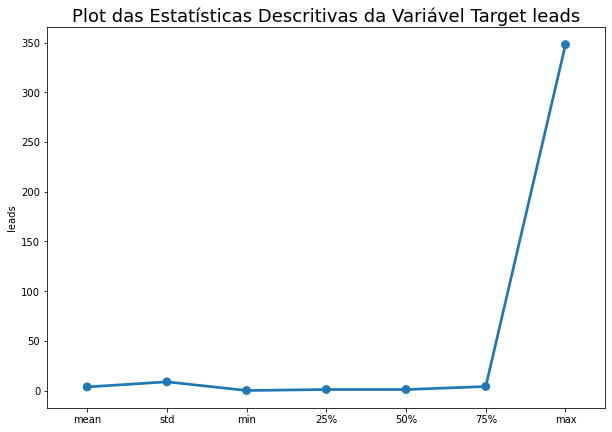

In [23]:
# Plot do describe da variável 'leads'

describe_lead = pd.DataFrame(df['leads'].describe())
describe_lead

plt.figure(figsize = (10,7))
sns.pointplot(data = describe_lead, y = describe_lead.leads[1:], x = describe_lead.index[1:])
plt.title('Plot das Estatísticas Descritivas da Variável Target leads', fontdict={'fontsize':18})
plt.show()

A grande maioria dos anúncios possuem lead baixos, cerca de 75% deles estão com até 4 leads

In [24]:
# Quase da metade dos anúncios possuem apenas 1 lead
df.leads.value_counts().head(5)

1     20638
0      9286
4      5439
8      2276
12     1198
Name: leads, dtype: int64

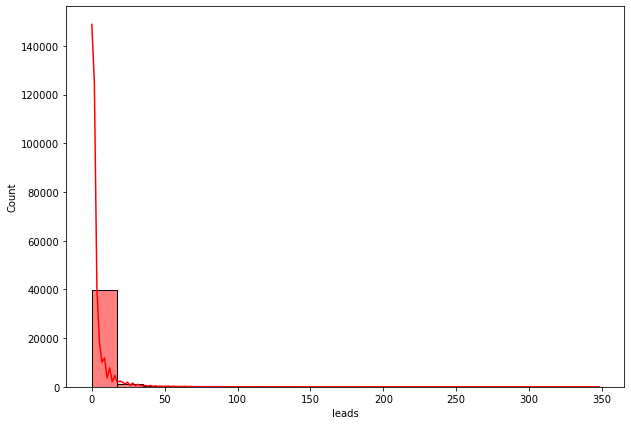

In [25]:
# Visualização da distribuição da variável target (leads)
plt.figure(figsize = (10,7))

sns.histplot(data = df, x = df.leads, bins = 20, color = 'r', kde = True)

É possível verificar uma distribuição totalmente desbalanceada para a variável 'leads', com uma concentração de registros com até 10 leads

In [26]:
df.leads.describe()

count    41322.000000
mean         3.600261
std          8.712076
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        348.000000
Name: leads, dtype: float64

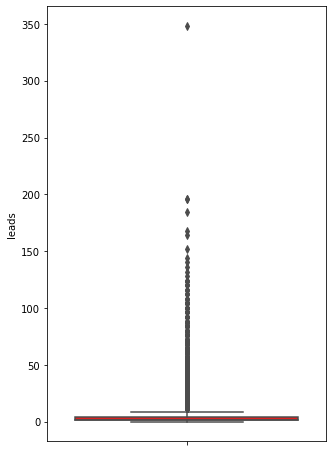

In [27]:
# Boxplot da variável target 'leads'
plt.figure(figsize= (5,8))

sns.boxplot(data = df, y = 'leads', orient = 'v', color = 'r')

É possível verificar uma grande quantidade de outliers.

In [28]:
# Visualizando os registros com maiores números de leads
df.loc[df.leads.nlargest(5).index]

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
41678,140393,4155,2,3,348,392,201,16,1194,311585,2004,3,SP_SÃ£o Paulo,16990.0,1,110000,18985.25460,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina,manual,4.0,S,S,S,N,S,N,S,S,S,N,N,N
41626,110626,3412,2,3,196,236,149,2,3340,344558,2013,4,SP_SÃ£o Paulo,29900.0,5,21247,31744.32162,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,manual,4.0,N,S,S,N,S,S,N,S,S,N,N,N
41664,108213,19289,1,1,196,228,179,16,3053,342656,2013,3,SP_SÃ£o Paulo,36500.0,8,68900,43563.58112,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N
38571,176263,4564,2,1,184,1000,136,218,3511,346906,2016,13,SP_Campinas,59990.0,8,34500,65879.97643,1,1,1.0,1.0,0,1.0,0,0,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
40861,137489,13067,1,1,168,372,152,17,3130,344308,2013,1,SP_SÃ£o Paulo,42000.0,8,65000,60415.40415,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N


In [29]:
# Vamos considerar outliers, registros com valores de zscore maior que t3

qtd_leads = []
zscore = stats.zscore(df.leads)
for i in zscore:
    if i > 3:
        qtd_leads.append(i)
print(len(qtd_leads))

# Temos 766 registros considaderados como outliers na coluna leads que poderão ser tratados posteriormente

766


In [30]:
df.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'leads',
       'views', 'cliques_telefone*', 'cod_marca_veiculo', 'cod_modelo_veiculo',
       'cod_versao_veiculo', 'ano_modelo', 'cep_2dig', 'uf_cidade',
       'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [31]:
# Separando as colunas numéricas das categóricas

num_var = ['leads', 'views', 'cliques_telefone*','vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',]

cat_var = ['leads','cod_tipo_pessoa', 'prioridade','cod_marca_veiculo', 'cod_modelo_veiculo','cod_versao_veiculo', 'ano_modelo',
           'uf_cidade','flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago', 'flg_todas_revisoes_concessionaria',
           'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica','flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
           'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
           'rodasliga', 'sensorchuva', 'sensorestacion']

## Variáveis Categóricas

* Como não é possível fazer correlação entre variáveis categóricas e variáveis contínuas ('leads'), irei separar as variáveis e análisar a influência delas na variável target('lead') e depois fazer concatenações com outras variáveis categóricas para verificar o quanto influencia na target

In [32]:
df_cat = df[cat_var]

In [33]:
df_cat.columns

Index(['leads', 'cod_tipo_pessoa', 'prioridade', 'cod_marca_veiculo',
       'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'uf_cidade',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [34]:
# Criando uma lista com os nomes das colunas do tipo 'object'
obj_list = df.select_dtypes(include = ['object']).columns.to_list()
obj_list

['uf_cidade',
 'combustivel',
 'cambio',
 'alarme',
 'airbag',
 'arquente',
 'bancocouro',
 'arcondic',
 'abs',
 'desembtras',
 'travaeletr',
 'vidroseletr',
 'rodasliga',
 'sensorchuva',
 'sensorestacion']

In [35]:
# quantidade de valores unicos das marcas, modelos e versões dos carros anunciados
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_versao_veiculo']].nunique()

cod_marca_veiculo       44
cod_modelo_veiculo     428
cod_versao_veiculo    2881
dtype: int64

In [36]:
# Cidades que mais aparecerem no dataset
df.uf_cidade.value_counts().head(10)

SP_SÃ£o Paulo                 7136
RJ_Rio de Janeiro             1841
PR_Curitiba                   1825
DF_BrasÃ­lia                  1477
MG_Belo Horizonte             1183
SP_Campinas                   1163
SP_SÃ£o Bernardo do Campo      701
SP_Santo AndrÃ©                637
RS_Porto Alegre                606
SP_SÃ£o JosÃ© do Rio Preto     587
Name: uf_cidade, dtype: int64

In [37]:
# Describe das variáveis do tipo 'object'
df[obj_list].describe()

,uf_cidade,combustivel,cambio,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322
unique,844,10,7,2,2,2,2,2,2,2,2,2,2,2,2
top,SP_SÃ£o Paulo,gasolina e alcool,manual,S,S,S,N,S,S,S,S,S,S,N,N
freq,7136,31650,23415,25751,28219,26243,28115,35562,26406,26278,35476,35188,22739,38106,29904


In [38]:
# Describe das variáveis categóricas que estão representadas numéricamente
df_cat.describe()

,leads,cod_tipo_pessoa,prioridade,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas
count,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000
mean,3.600261,1.882411,2.614781,18.643023,2072.048110,343161.451817,2013.517037,0.212574,0.299380,0.400610,0.148105,0.060500,0.069576,0.017013,0.070955,0.000387,3.858042
std,8.712076,0.322124,0.760240,36.442259,1110.922968,8338.140697,3.473578,0.409134,0.457992,0.490028,0.355208,0.238415,0.254433,0.129320,0.256753,0.019674,0.506469
min,0.000000,1.000000,1.000000,2.000000,650.000000,1429.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,2.000000,3.000000,4.000000,788.000000,342655.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,2.000000,3.000000,5.000000,2487.000000,344131.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,4.000000,2.000000,3.000000,26.000000,3202.000000,345486.000000,2016.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,348.000000,2.000000,3.000000,304.000000,3676.000000,347728.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Variável combustivel

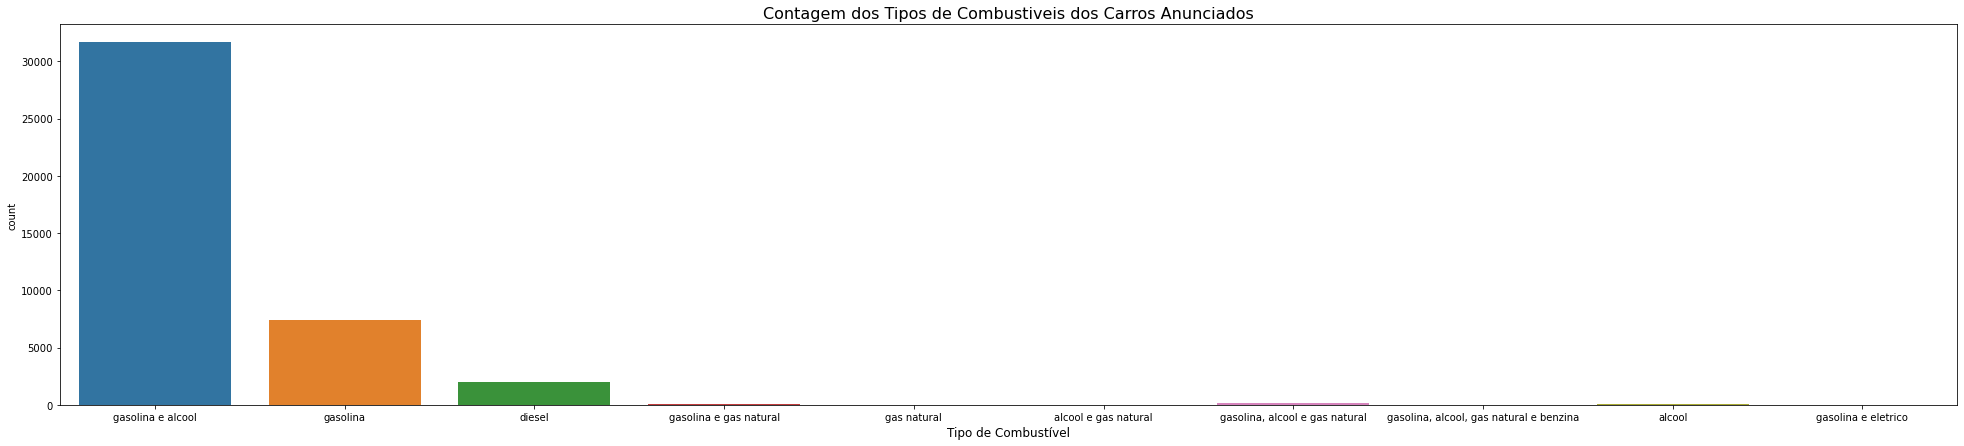

In [39]:
# Visualização da quantidade de anúncio pra cada tipo de combustível.
plt.figure(figsize = (34,7))

sns.countplot(x = df.combustivel)
plt.title('Contagem dos Tipos de Combustiveis dos Carros Anunciados', fontdict={'fontsize':16})
plt.xlabel('Tipo de Combustível', fontdict = {'fontsize': 12})
plt.show()

> A maior parte dos carros são flex(gasolina e álcool), seguidos por abastecimento a gasolina e diesel

Relação do Tipo de Combustível com a Variável Target 'leads'

In [40]:
# Agrupando por combustivel
df_comb = df_cat.groupby('combustivel').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_comb

,leads
combustivel,
"gasolina, alcool, gas natural e benzina",17.625000
gasolina e eletrico,5.750000
"gasolina, alcool e gas natural",5.218391
gasolina,4.949872
diesel,4.721797
gasolina e gas natural,3.413793
gasolina e alcool,3.204613
alcool,2.375000
gas natural,2.346154


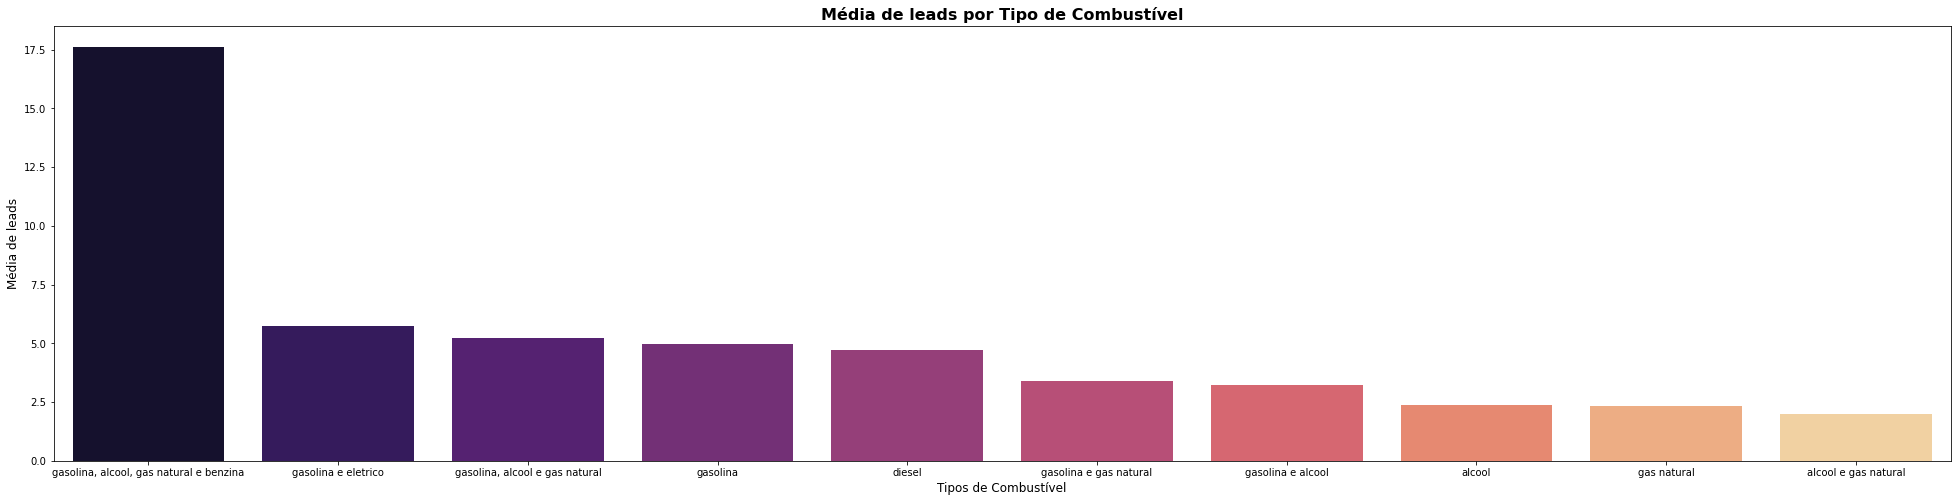

In [41]:
# Barplot da Média do número de leads por estado
plt.figure(figsize = (34,8))

sns.barplot(data = df_comb, x = df_comb.index, y = df_comb.leads, palette = 'magma')
plt.title('Média de leads por Tipo de Combustível', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Tipos de Combustível', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Carros que aceitam todos os tipos de combustíveis são, isoladamente, os que mais recebem leads. No entanto, esses tipo de automóveis não são muito comuns.  
Carros a gasolina e a diesel, que ja são carros que são mais frequentemente anunciados, possuem uma média de 4.9 e 4.7 respectivamente de leads por anúncio.

### Variável cambio

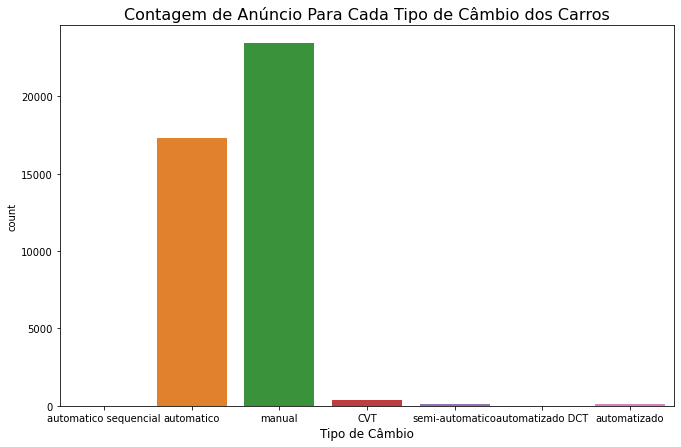

In [42]:
# Visualização da quantidade de anúncio pra cada tipo de câmbio.
plt.figure(figsize = (11,7))

sns.countplot(x = df.cambio)
plt.title('Contagem de Anúncio Para Cada Tipo de Câmbio dos Carros', fontdict={'fontsize':16})
plt.xlabel('Tipo de Câmbio', fontdict = {'fontsize': 12})
plt.show()

> Duas categorias de câmbio dominam no número de aparições: Manual, seguido por Automático

Relação do Tipo de Câmbio com a Variável Target 'leads'

In [43]:
# Agrupando a por câmbio
df_cambio = df_cat.groupby('cambio').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_cambio

,leads
cambio,
CVT,8.595801
automatizado,6.010638
automatizado DCT,5.285714
automatico,4.315963
manual,2.986718
semi-automatico,2.258929
automatico sequencial,0.250000


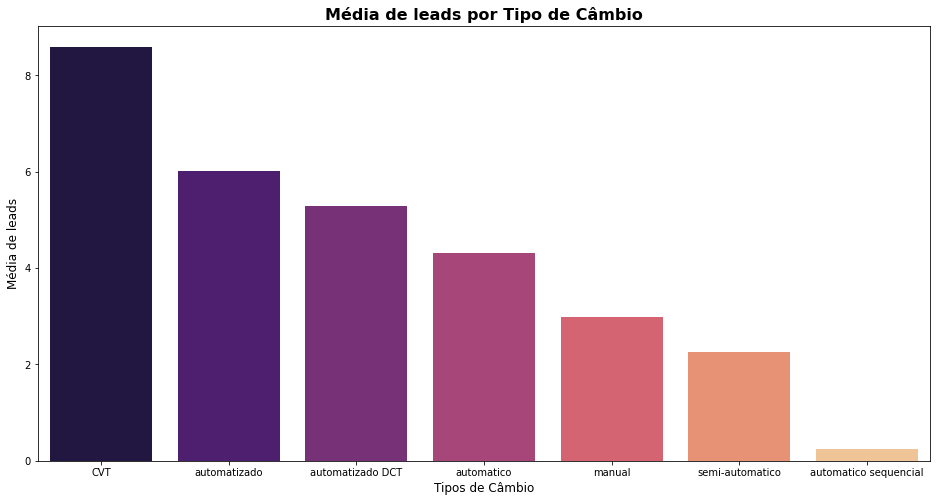

In [44]:
# Barplot da Média do número de leads por estado
plt.figure(figsize = (16,8))

sns.barplot(data = df_cambio, x = df_cambio.index, y = df_cambio.leads, palette = 'magma')
plt.title('Média de leads por Tipo de Câmbio', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Tipos de Câmbio', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Vemos que carros com câmbio do tipo CVT são os que mais recebem 'leads', seguido por automatizado e automatizado DCT.  
> No entanto, esses três tipos de câmbios não são tão populares entre os anúncios de carros.  
> Os tipos de câmbios mais populares (automático e manual) têm média de aproximadamente 4.3 e 3(respectivamente) leads por anúncios.

### Prioridade

In [45]:
# Quantidade de Anúncios Com Prioridade Baixa(3), Média(2) e Alta(1)
df.prioridade.value_counts()

3    32452
1     7048
2     1822
Name: prioridade, dtype: int64

In [46]:
df11 = df.copy()
df11['prioridade'] = np.where((df11['prioridade'] == 1), 'Alta',
                     np.where((df11['prioridade'] == 2), 'Media',
                     np.where((df11['prioridade'] == 3), 'Baixa',
                     0)))

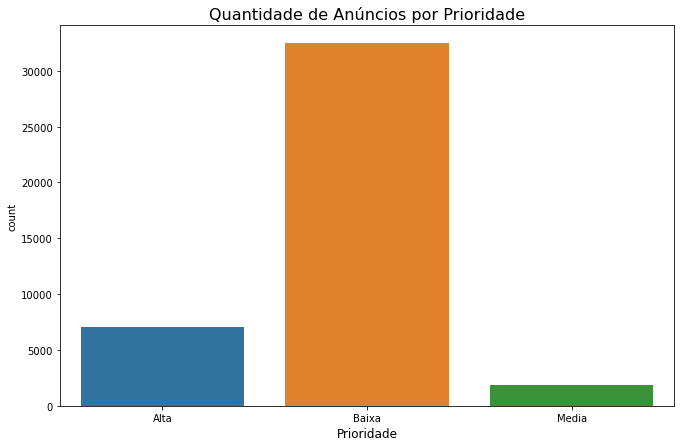

In [47]:
# Plot da quantidade de Anúncios por Prioridade
plt.figure(figsize = (11,7))

sns.countplot(x = df11.prioridade)
plt.title('Quantidade de Anúncios por Prioridade',fontdict={'fontsize':16})
plt.xlabel('Prioridade',fontdict={'fontsize':12})
plt.show()

In [48]:
# Agrupando a por Prioridade (Baixa(3), Média(2) e Alta(1))
df_prio = df11.groupby('prioridade').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_prio

,leads
prioridade,
Media,8.285950
Alta,5.869750
Baixa,2.844293


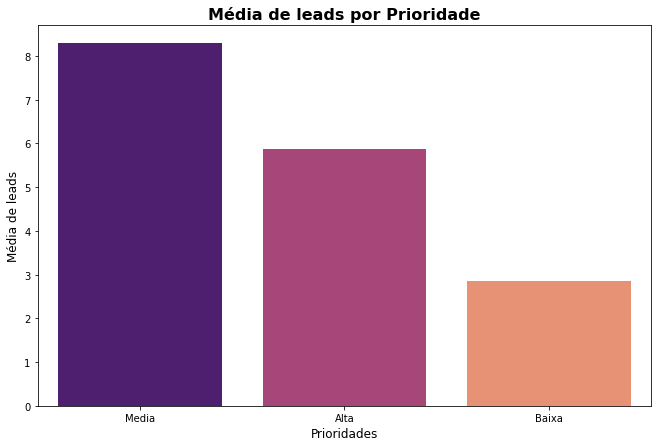

In [49]:
# Plot da média de leads em anúncios divido por prioridade
plt.figure(figsize = (11,7))

sns.barplot(data = df_prio, x = df_prio.index, y = df_prio['leads'], palette = 'magma')
plt.title('Média de leads por Prioridade', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Prioridades', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Anúncios com prioridade baixa costumam ter menos número de leads.  


### cod_marca/versao/modelo_veiculo

In [50]:
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_versao_veiculo']].nunique()

cod_marca_veiculo       44
cod_modelo_veiculo     428
cod_versao_veiculo    2881
dtype: int64

> Existem muitos modelos e versões de carros, e como eles estão representados por números, fica dificil conseguir relacioná-los em conjunto com o número de leads. Não conseguiriamos saber, por exemplo, se os 3 primeiros modelos de carros têm alguma relação entre si para inferir que 'x' modelo de carro tende a ter mais leads

In [51]:
# Relação da marca de veiculos com o número de leads
df_marca = df.groupby('cod_marca_veiculo').agg({'leads':'mean'})
df_marca.head()

,leads
cod_marca_veiculo,
2,3.201123
3,3.338371
4,2.582201
5,3.444425
8,5.038182


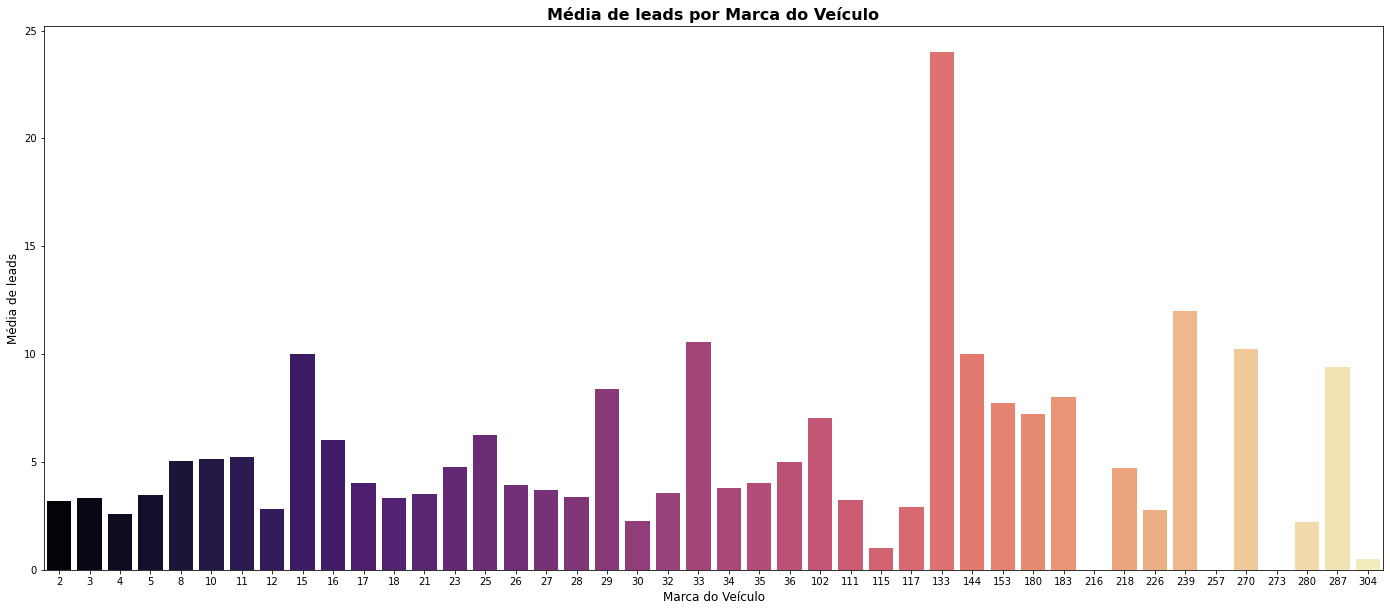

In [52]:
# Plot da média de leads em anúncios divido por prioridade
plt.figure(figsize = (24,10))

sns.barplot(data = df_marca, x = df_marca.index, y = df_marca['leads'], palette = 'magma')
plt.title('Média de leads por Marca do Veículo', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Marca do Veículo', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Conseguimos concluir que carros da marca 133 têm uma média de leads significantemente maior que seus concorrentes

### Ano modelo

In [53]:
# Verificando a quantidade de anúncios com diferentes anos de veículos
df.ano_modelo.nunique()

45

In [54]:
df.ano_modelo.value_counts()[:10]

2015    5819
2014    5413
2016    4780
2013    4637
2017    4056
2012    3581
2018    3568
2011    2750
2010    1965
2009    1393
Name: ano_modelo, dtype: int64

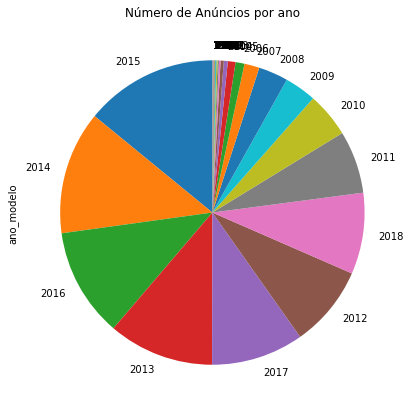

In [55]:
df.ano_modelo.value_counts().plot(kind = 'pie', figsize = (11,7), title = 'Número de Anúncios por ano', startangle= 90)

> Possível ver que apesar de haver carros com modelos de 45 anos diferentes, carros com ano de 2012 a 2018 (range 7 anos) representam mais de 75% de todos os anúncios

In [56]:
# Relação dos carros de 2012 a 2018 com a variável target leads
df_ano = df.groupby('ano_modelo').agg({'leads':'mean'})
df_ano = df_ano.sort_values('ano_modelo', ascending= False)[1:8]
df_ano

,leads
ano_modelo,
2018,3.019619
2017,3.386834
2016,3.039331
2015,3.441657
2014,3.595788
2013,3.773992
2012,3.759844


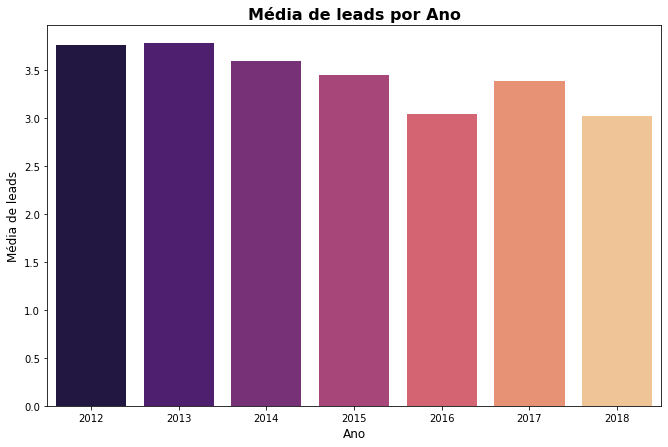

In [57]:
# Plot da média de leads em anúncios divido por prioridade
plt.figure(figsize = (11,7))

sns.barplot(data = df_ano, x = df_ano.index, y = df_ano['leads'], palette = 'magma')
plt.title('Média de leads por Ano', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Ano', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Com exceção do ano de 2017, a média de leads dos anúncios de carro com modelo a partir de 2012 (até 2019) tendem a diminuir com o passar dos anos.  
> No entanto, a diferença é muito pequena.

### Portas

In [58]:
df.portas.value_counts()

4.0    38239
2.0     2783
3.0      300
Name: portas, dtype: int64

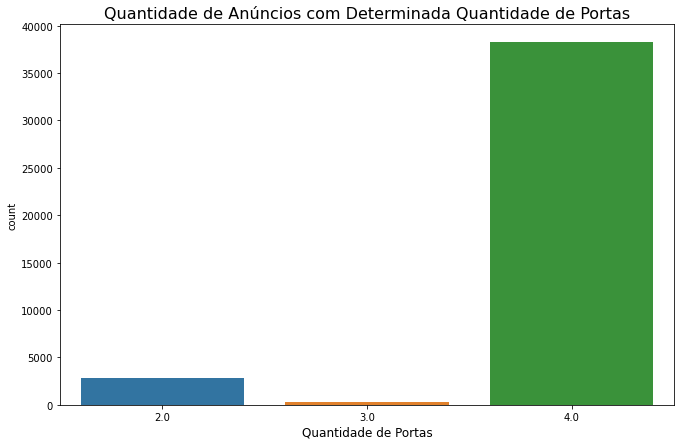

In [59]:
plt.figure(figsize = (11,7))

sns.countplot(data = df, x = df.portas)
plt.title('Quantidade de Anúncios com Determinada Quantidade de Portas',fontdict={'fontsize':16})
plt.xlabel('Quantidade de Portas',fontdict={'fontsize':12})
plt.show()

> Possível verificar que a grande parcela de anúncio são de carros com 4 portas

In [60]:
df_portas = df.groupby('portas').agg({'leads':'mean'})
df_portas

,leads
portas,
2.0,3.981315
3.0,3.360000
4.0,3.574414


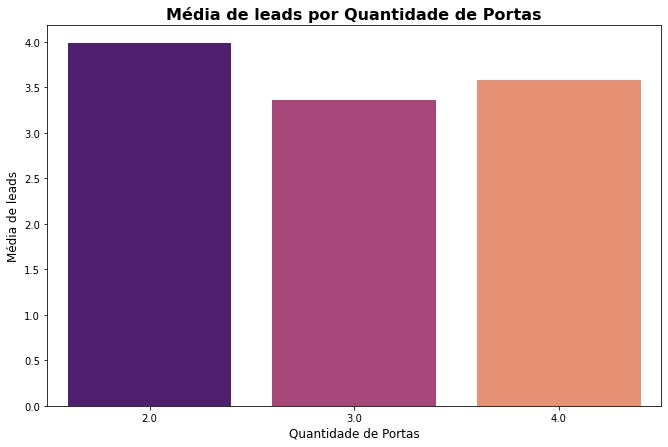

In [61]:
# Plot da média de leads em anúncios por qunatidade de portas
plt.figure(figsize = (11,7))

sns.barplot(data = df_portas, x = df_portas.index, y = df_portas['leads'], palette = 'magma')
plt.title('Média de leads por Quantidade de Portas', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Quantidade de Portas', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()

> Pode-se verificar que carros com 2 portas possuem uma média de leads levemente maior que carros com 4 (que comp]oe cerca de 93% do dataset)

### Variáveis Binárias

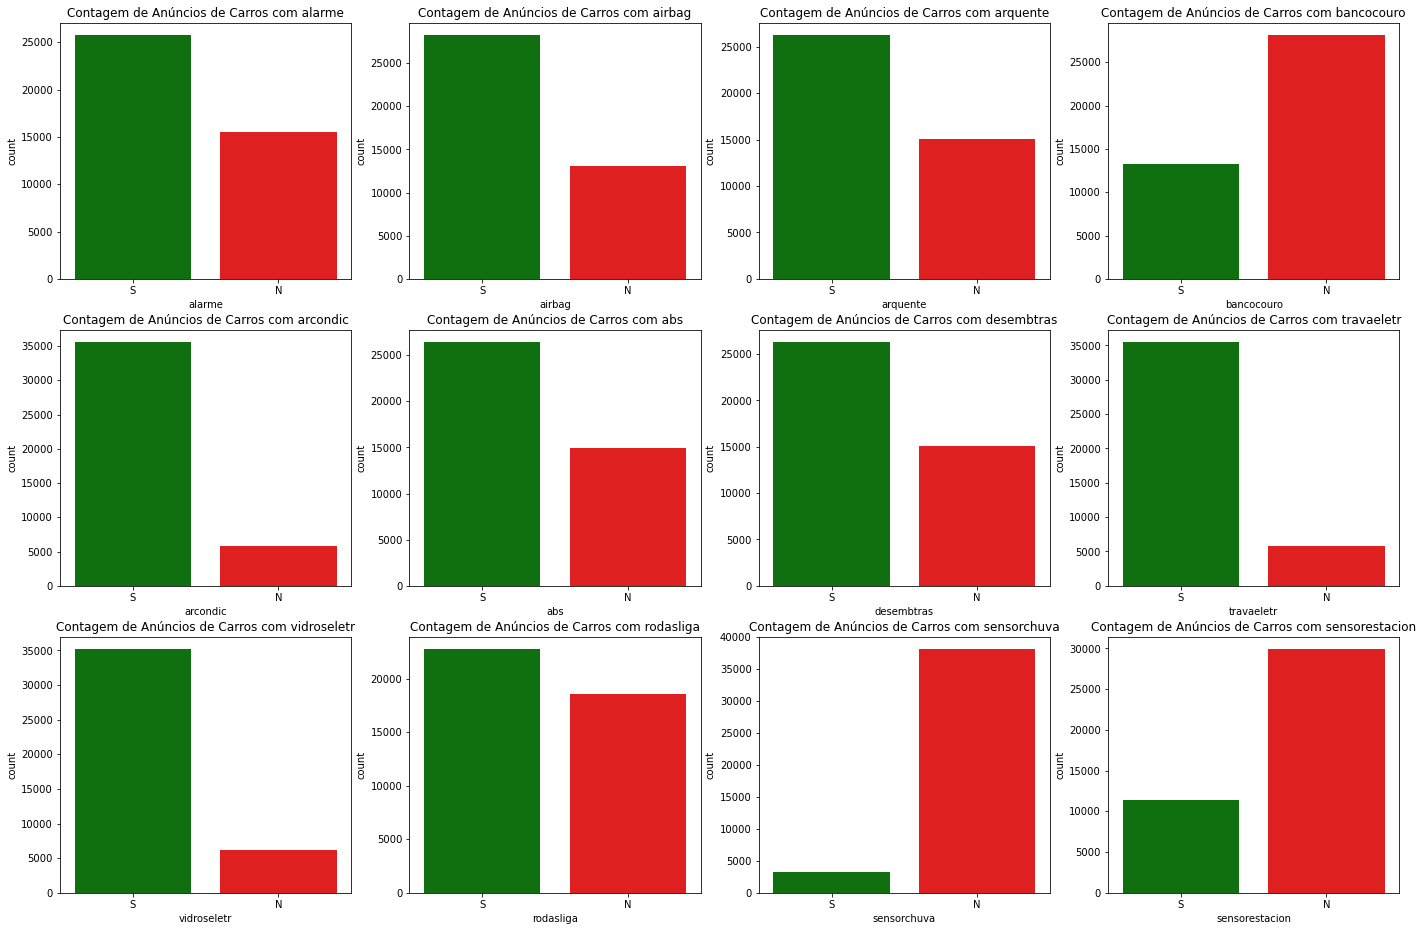

In [62]:
# Visualização das das variáveis 'categóricas' binárias
plt.figure(figsize = (24,16))

for i in range(3, len(obj_list)):
    plt.subplot(3,4, i+1-3)

    sns.countplot(data = df, x = df[obj_list[i]], palette=  ['green','red'])
    plt.title(f'Contagem de Anúncios de Carros com {obj_list[i]}', fontdict={'fontsize':12})

In [63]:
# Outras variáveis binárias
df_cat_bi2 = df[['leads','flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago','flg_todas_revisoes_concessionaria','flg_todas_revisoes_agenda_veiculo',
                 'flg_garantia_fabrica','flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd']]

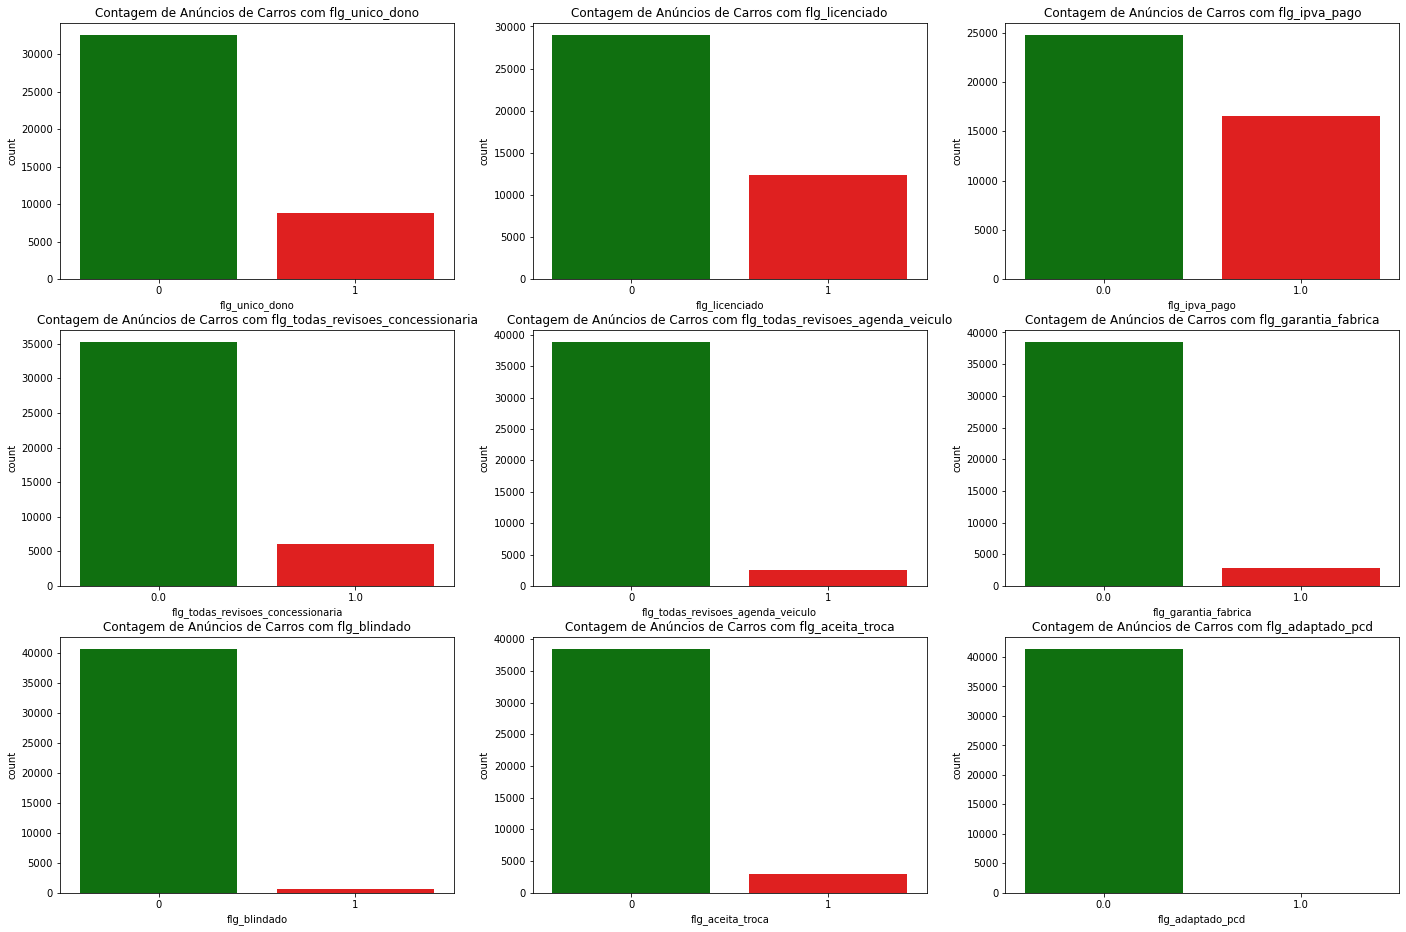

In [64]:
# Visualização dos restante das variáveis 'categóricas' binárias (0 -> Não, 1 -> Sim)
plt.figure(figsize = (24,16))

for i in range(1, len(df_cat_bi2.columns)):
    plt.subplot(3,3, i)

    sns.countplot(data = df, x = df[df_cat_bi2.columns[i]], palette =  ['green','red'])
    plt.title(f'Contagem de Anúncios de Carros com {df_cat_bi2.columns[i]}', fontdict={'fontsize':12})

> Apenas algumas variáveis tiveram uma quantidade relevante no dataset (fig_unico_dono, fig_licenciado, fig_ipva_pago)

In [65]:
df_cat_bi = df_cat[['alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs',
        'desembtras', 'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva', 'sensorestacion']]

In [66]:
# for i in range(0, len(df_cat_bi.columns)):
    
#     df_cat_bi[(df_cat_bi.columns[i])] = np.where(df_cat_bi[df_cat_bi.columns[i]] == 'S', 1, 0)

### Feature Engineer

* Separando a coluna 'uf_cidade' em duas ('uf', 'cidade')

In [67]:
# Podemos separar a variável uf_cidade em duas colunas (uf, cidade)
df.uf_cidade.head()

2                       SP_PoÃ¡
3                 SP_SÃ£o Paulo
4     SP_SÃ£o Bernardo do Campo
9      SP_SÃ£o JosÃ© dos Campos
21    SP_SÃ£o Bernardo do Campo
Name: uf_cidade, dtype: object

In [68]:
# Separando a coluna uf_cidade em 'uf' e 'cidade'
df[['uf', 'cidade']] = df.uf_cidade.str.split('_', expand = True)

In [69]:
# Reposicionando as colunas 'uf' e 'cidade'
df.insert(12, 'uf', df.pop('uf'))
df.insert(13, 'cidade', df.pop('cidade'))

In [70]:
# Removendo a coluna uf_cidade
df.pop('uf_cidade')

2                          SP_PoÃ¡
3                    SP_SÃ£o Paulo
4        SP_SÃ£o Bernardo do Campo
9         SP_SÃ£o JosÃ© dos Campos
21       SP_SÃ£o Bernardo do Campo
                   ...            
42152                SP_SÃ£o Paulo
42153                    SP_AvarÃ©
42154                SP_SÃ£o Paulo
42155                SP_SÃ£o Paulo
42156                SP_SÃ£o Paulo
Name: uf_cidade, Length: 41322, dtype: object

In [71]:
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
2,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP,PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
3,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP,SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
4,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP,SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N
9,200,16006,1,1,0,0,13,2,2950,342268,2012,12,SP,SÃ£o JosÃ© dos Campos,44000.0,5,140000,45785.57787,1,1,1.0,1.0,1,1.0,0,0,0.0,gasolina,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N
21,303,80,1,3,0,0,8,3,1146,339886,2008,9,SP,SÃ£o Bernardo do Campo,18800.0,7,155000,20273.00157,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,manual,4.0,S,N,S,N,S,N,S,S,S,N,N,N


### Variável uf

In [72]:
# Contagem de aparições de cada estado no dataset
df_uf_count = df.groupby('uf').agg({'uf':'count'})
df_uf_count.rename(columns={'uf':'contagem'}, inplace = True)
df_uf_count  = df_uf_count.sort_values('contagem', ascending= False)
df_uf_count

,contagem
uf,
SP,19069
PR,3988
SC,3524
RJ,3070
MG,2651
RS,2206
DF,1483
GO,744
PE,685


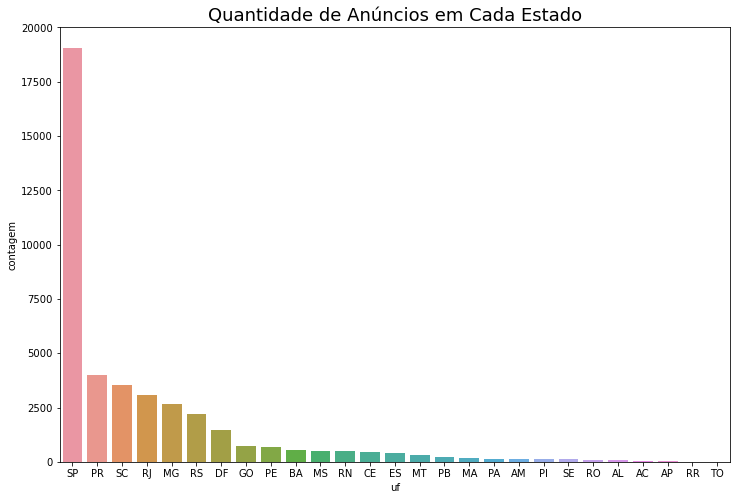

In [73]:
plt.figure(figsize = (12,8))

sns.barplot(data = df_uf_count, x = df_uf_count.index, y = df_uf_count.contagem)
plt.title('Quantidade de Anúncios em Cada Estado', fontdict={'fontsize': 18})
plt.show()

In [74]:
# Agrupando o df por uf e extraindo a média de leads
df_uf = df.groupby('uf').agg({'leads':'mean'}).sort_values('leads', ascending = False)
df_uf.head()

,leads
uf,
SP,5.350097
AC,3.761905
RJ,3.246906
GO,2.563172
MG,2.507733


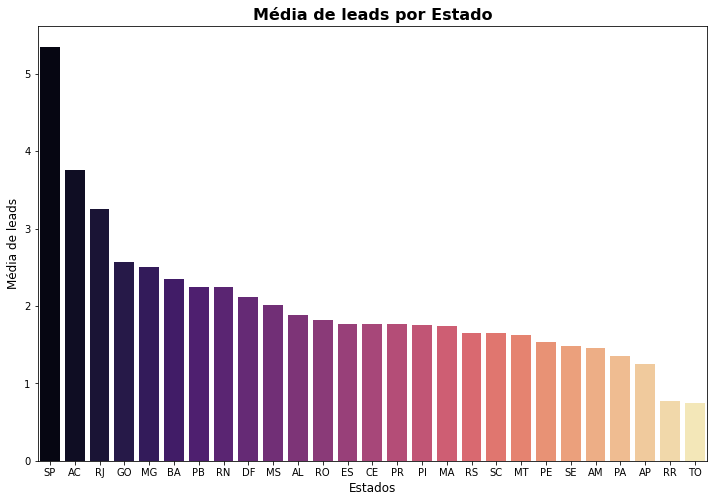

In [75]:
# Barplot da Média do número de leads por estado
plt.figure(figsize = (12,8))

sns.barplot(data = df_uf, x = df_uf.index, y = df_uf.leads, palette = 'magma')
plt.title('Média de leads por Estado', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Estados', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})
plt.show()


Podemos notar que anúncios de SP tem uma média de leads por anúncio significantemente maior que os outros estados.  
Surpreendentemente, o estado do AC bem vem em segundo, com uma média de 3,76 leads por anúncio, seguidos por RJ, GO e MG.

No entanto, vale ressaltar que o estado de AC, apesar do alto número de leads por anúncio, possui pouquissima amostragem, com apenas 21 anuncios.

### Variável cidade

In [76]:
df_cid_count = df.groupby('cidade').agg({'cidade':'count'})
df_cid_count.rename(columns={'cidade':'contagem'}, inplace = True)
df_cid_count  = df_cid_count.sort_values('contagem', ascending= False)
df_cid_count

,contagem
cidade,
SÃ£o Paulo,7136
Rio de Janeiro,1841
Curitiba,1825
BrasÃ­lia,1477
Belo Horizonte,1183
...,...
Rio Brilhante,1
Cruz das Almas,1
Major Vieira,1


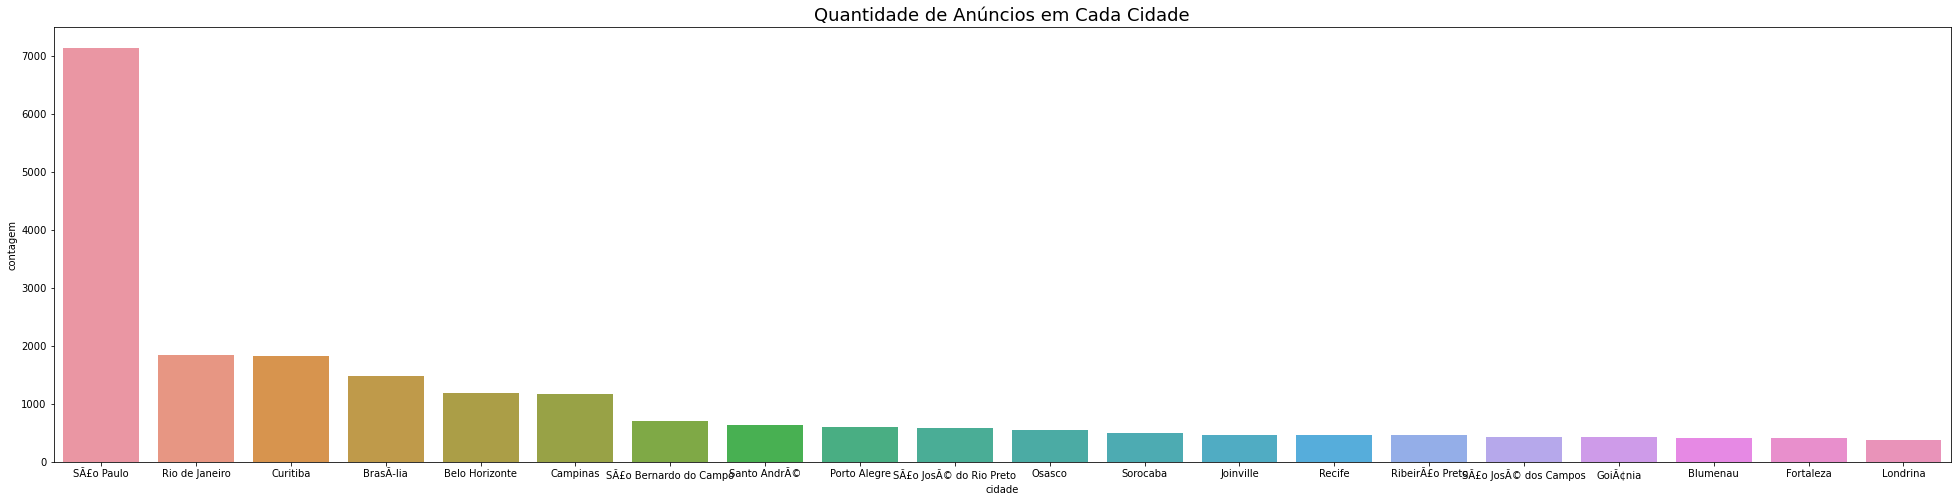

In [77]:
# Plot do top 20 cidades com mais anúncios
plt.figure(figsize = (34,8))

sns.barplot(data = df_cid_count, x = df_cid_count.index[:20], y = df_cid_count.contagem[:20])
plt.title('Quantidade de Anúncios em Cada Cidade', fontdict={'fontsize': 18})
plt.show()


In [78]:
# Agrupando o df por cidade(e uf, para conseguirmos saber de que estado é aquela cidade) e extraindo a média de leads
df_cid = df.groupby(['uf','cidade']).agg({'leads':'mean'}).sort_values('leads', ascending= False)
df_cid

leads
uf cidade                
SP São Paulo       48.000
   Jarinu          28.000
RJ Japeri          28.000
SP Monte Mor       28.000
   Nhandeara       20.125
...                   ...
CE Caucaia          0.000
SP CesÃ¡rio Lange   0.000
BA Valente          0.000
   Serrinha         0.000
MG Inhapim          0.000

[844 rows x 1 columns]

In [79]:
df_cid = df_cid.reset_index()
df_cid.head(3)

,uf,cidade,leads
0,SP,São Paulo,48.0
1,SP,Jarinu,28.0
2,RJ,Japeri,28.0


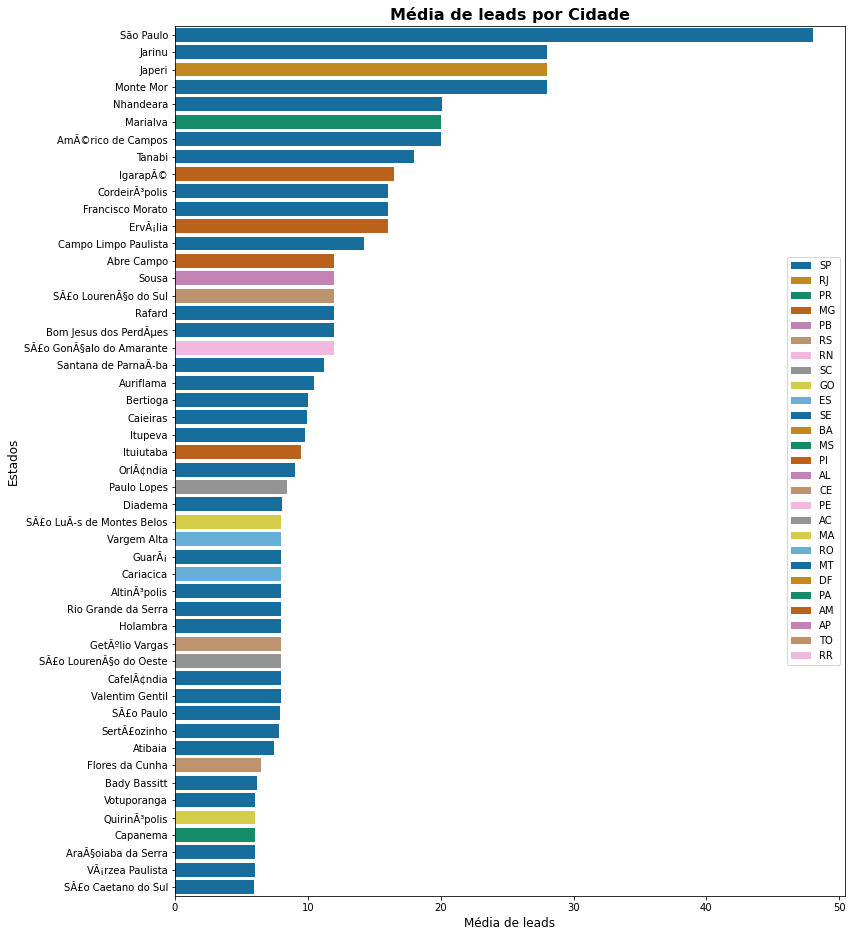

In [80]:
# Barplot da Média do número de leads por cidade
# Como temos mais de 800 registros, vamos plotar apenas as 30 cidades com maior número de leads
plt.figure(figsize = (12,16))

sns.barplot(data = df_cid[0:50], y = df_cid.cidade[0:50], x = df_cid.leads[0:50], palette = 'colorblind', hue = df_cid.uf, dodge = False)
plt.title('Média de leads por Cidade', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Média de leads', fontdict = {'fontsize': 12})
plt.ylabel('Estados', fontdict = {'fontsize': 12})
plt.legend(loc = 'right')
plt.show()

> Pudemos confirmar a dominância do estado de SP nas cidades com as maiores médias de leads por anúncio.

> Das cidades com mais anúncios, apenas a capital São Paulo aparece com o maior número de leads

### Plotagem de variáveis binárias

In [81]:
df_cat_bi.columns

Index(['alarme', 'airbag', 'arquente', 'bancocouro', 'arcondic', 'abs',
       'desembtras', 'travaeletr', 'vidroseletr', 'rodasliga', 'sensorchuva',
       'sensorestacion'],
      dtype='object')

In [82]:
df_cat_bi = pd.concat([df.leads, df_cat_bi], axis = 1)

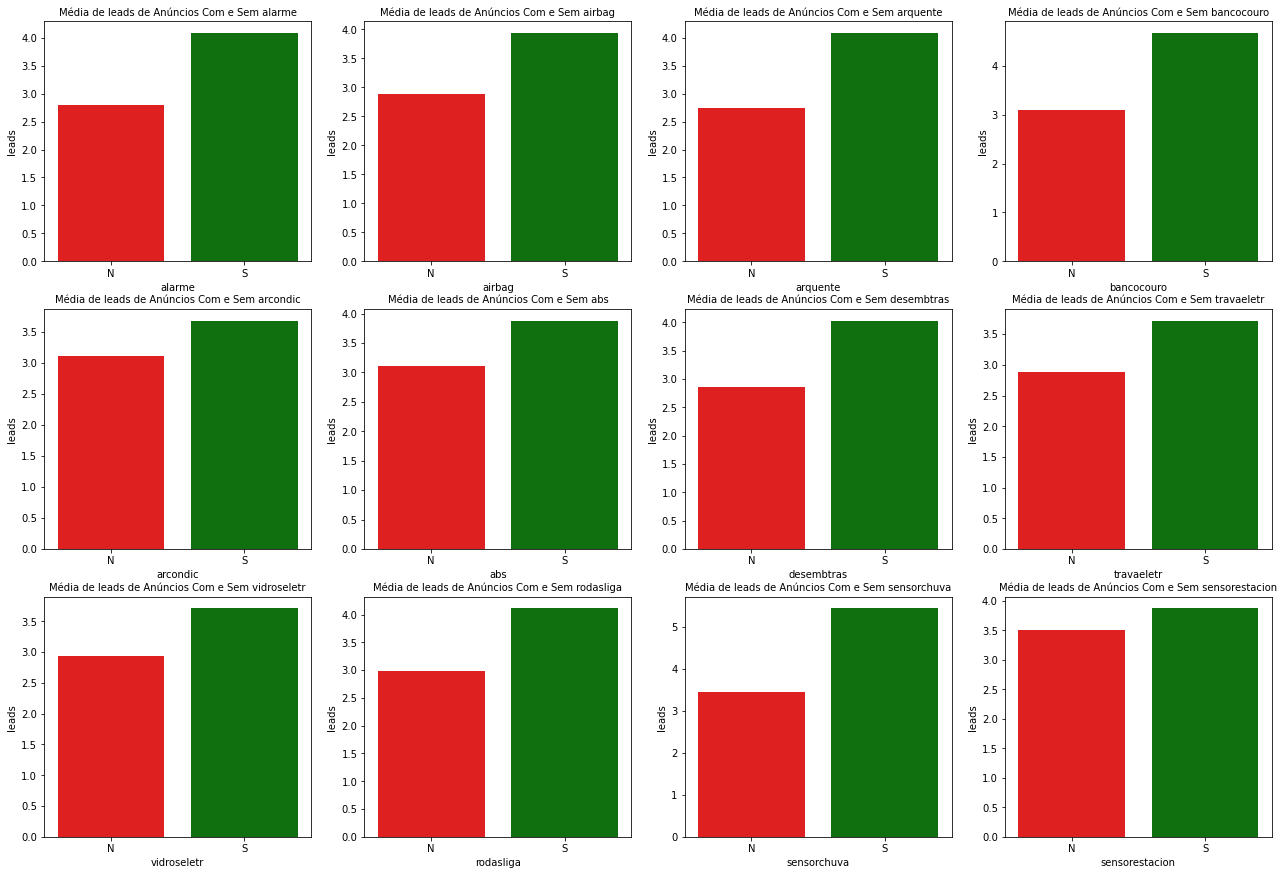

In [83]:
# Plot da média de leads para algumas variáveis categóricas
# 0 -> Não, 1 -> Sim

plt.figure(figsize = (22,15))

for i in range(1,len(df_cat_bi.columns)):
    
    plt.subplot(3,4, i)
    
    df_plot = df_cat_bi.groupby(df_cat_bi.columns[i]).agg({'leads':'mean'})
    df_plot = df_plot.reset_index()
    df_plot.leads = df_plot.leads.apply(lambda x: round(x,2))
    sns.barplot(data = df_plot, y = df_plot.leads, x = df_plot[df_cat_bi.columns[i]], palette = ['red','green'])
    plt.title(f'Média de leads de Anúncios Com e Sem {df_cat_bi.columns[i]}', fontdict = {'fontsize':10})

> Pode-se notar que anúncios que tinham acessórios 'extras', tiveram maior número de leads.  
> A presneça de sensor de chuva nos veículos aparenta ser uma variável que influência bastante o número de leads.

In [84]:
df.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'leads',
       'views', 'cliques_telefone*', 'cod_marca_veiculo', 'cod_modelo_veiculo',
       'cod_versao_veiculo', 'ano_modelo', 'cep_2dig', 'uf', 'cidade',
       'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [85]:
df_cat_bi2 = df[['leads','flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago','flg_todas_revisoes_concessionaria','flg_todas_revisoes_agenda_veiculo',
                 'flg_garantia_fabrica','flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd']]

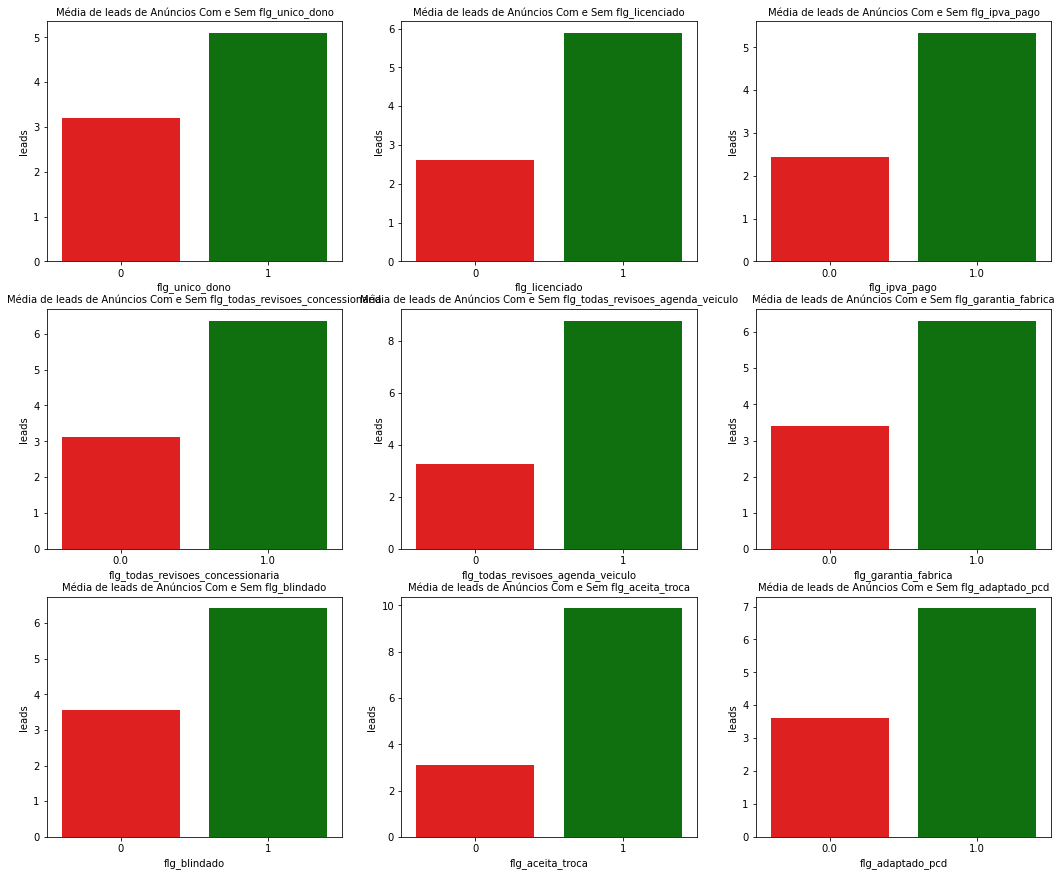

In [86]:
# Plot da média de leads para as variáveis categóricas binárias restantes
# 0 -> Não, 1 -> Sim

plt.figure(figsize = (18,15))

for i in range(1,len(df_cat_bi2.columns)):
    
    plt.subplot(3,3, i)
    
    df_plot = df_cat_bi2.groupby(df_cat_bi2.columns[i]).agg({'leads':'mean'})
    df_plot = df_plot.reset_index()
    df_plot.leads = df_plot.leads.apply(lambda x: round(x,2))
    sns.barplot(data = df_plot, y = df_plot.leads, x = df_plot[df_cat_bi2.columns[i]], palette = ['red','green'])
    plt.title(f'Média de leads de Anúncios Com e Sem {df_cat_bi2.columns[i]}', fontdict = {'fontsize':10})

> Novamente, pode-se notar que anúncios que possuiam mais acessórios/opções, obtiveram maior número de leads.  
> Destaque para algumas variáveis que parecem ter alta influência positiva no número de leads do anúncio: flg_aceita_troca, flg_todas_revisoes_agenda_veículo e flg_adaptado_pcd

## Análise de Variáveis Categóricas Combinadas

* Irei procurar padrões no número de leads quando o anúncio atende a mais de uma condição

Carros que contém arcondc e vidroseletr possuem mais leads que a média?

In [87]:
df_cat.columns

Index(['leads', 'cod_tipo_pessoa', 'prioridade', 'cod_marca_veiculo',
       'cod_modelo_veiculo', 'cod_versao_veiculo', 'ano_modelo', 'uf_cidade',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

### Ar condicionado e Vidros elétricos

Essas duas variáveis foram selecionadas pois, na minha visão, são acessórios que muitas pessoas possam considerar essênciais ao comprar um automóvel

In [88]:
df_ar_vidro = df.groupby(['arcondic','vidroseletr']).agg({'leads':'mean'}).reset_index()
df_ar_vidro

,arcondic,vidroseletr,leads
0,N,N,2.905556
1,N,S,3.569444
2,S,N,3.013799
3,S,S,3.722505


In [89]:
df_ar_vidro['arcondic'] = np.where((df_ar_vidro.arcondic) == 'N', 'Sem Ar Cond.', 'Com Ar Cond.')
df_ar_vidro['vidroseletr'] = np.where((df_ar_vidro.vidroseletr) == 'N', 'Sem Vidros Elétricos', 'Com Vidros Elétricos')

In [90]:
df_ar_vidro

,arcondic,vidroseletr,leads
0,Sem Ar Cond.,Sem Vidros Elétricos,2.905556
1,Sem Ar Cond.,Com Vidros Elétricos,3.569444
2,Com Ar Cond.,Sem Vidros Elétricos,3.013799
3,Com Ar Cond.,Com Vidros Elétricos,3.722505


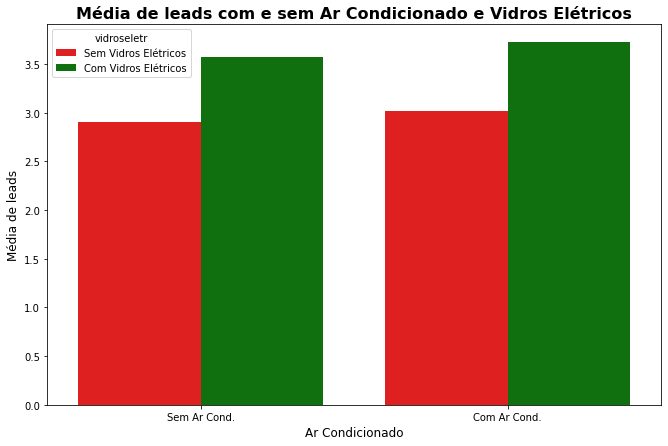

In [91]:
# Plot da média de leads em anúncios divido com e sem ar condicionado e vidros elétricos
plt.figure(figsize = (11,7))

ax = sns.barplot(data = df_ar_vidro, x = 'arcondic', y = 'leads', hue = 'vidroseletr', palette = ['red','green'])

plt.title('Média de leads com e sem Ar Condicionado e Vidros Elétricos', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Ar Condicionado', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})

plt.show()

> É possível verificar que a combinação de ambos tendem a aumentar o número de leads.  
> É possível ver também que carros com vidros elétricos parecem ter mais influência no número de leads.

### Carros licenciados e com airbag

Selecionei essas variáveis pois as duas parecem ter uma influência positiva no número de leads e ambas têm número de registro relevantes para as duas opções


In [92]:
df_air_lic = df.groupby(['flg_licenciado', 'airbag']).agg({'leads':'mean'}).reset_index()
df_air_lic

,flg_licenciado,airbag,leads
0,0,N,2.358465
1,0,S,2.768635
2,1,N,4.937143
3,1,S,6.151549


In [93]:
df_air_lic['flg_licenciado'] = np.where((df_air_lic['flg_licenciado']) == 0, 'Licenciamento Não Está em Dia', 'Licenciamento Está em Dia')
df_air_lic['airbag'] = np.where((df_air_lic['airbag']) == 'N', 'Não Tem Airbag', 'Tem Airbag')

In [94]:
df_air_lic

,flg_licenciado,airbag,leads
0,Licenciamento Não Está em Dia,Não Tem Airbag,2.358465
1,Licenciamento Não Está em Dia,Tem Airbag,2.768635
2,Licenciamento Está em Dia,Não Tem Airbag,4.937143
3,Licenciamento Está em Dia,Tem Airbag,6.151549


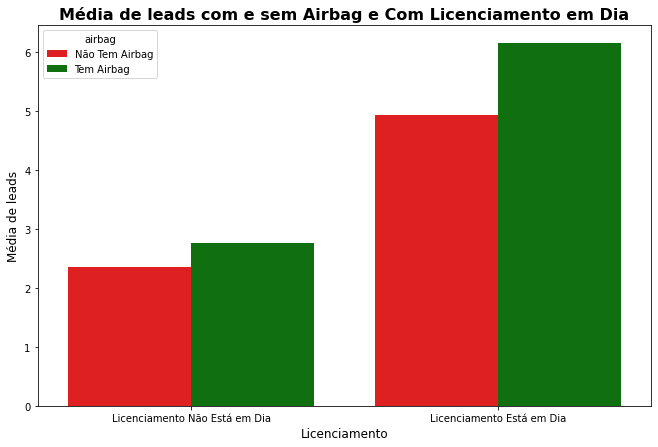

In [95]:
# Plot da média de leads em anúncios divido com e sem ar condicionado e vidros elétricos
plt.figure(figsize = (11,7))

ax = sns.barplot(data = df_air_lic, x = 'flg_licenciado', y = 'leads', hue = 'airbag', palette = ['red','green'])

plt.title('Média de leads com e sem Airbag e Com Licenciamento em Dia', fontdict = {'fontsize': 16}, weight = 'bold')
plt.xlabel('Licenciamento', fontdict = {'fontsize': 12})
plt.ylabel('Média de leads', fontdict = {'fontsize': 12})

plt.show()

> Pode-se notar que a variável 'flg_licenciamento' tem bastante interferência no número de leads. Quando o licenciamento está em dia, independente da tem ou não airbag, o número médio de leads no anúncios é significantemente maior

## Variáveis Numéricas

In [96]:
df_num = df[num_var]

In [97]:
df_num.head(5)

,leads,views,cliques_telefone*,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado
2,0,0,6,31900.0,8,74000,26875.00573
3,0,0,2,25500.0,8,128000,23779.45322
4,0,0,10,23990.0,6,60000,22428.12461
9,0,0,13,44000.0,5,140000,45785.57787
21,0,0,8,18800.0,7,155000,20273.00157


In [98]:
df_num.describe()

,leads,views,cliques_telefone*,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado
count,41322.000000,41322.000000,41322.000000,4.132200e+04,41322.000000,4.132200e+04,41322.000000
mean,3.600261,418.666473,6.569963,8.574010e+04,6.681138,2.126215e+05,52595.959593
std,8.712076,604.503062,8.842611,1.570972e+06,2.137584,1.421112e+07,41158.547585
min,0.000000,0.000000,0.000000,4.900000e+03,0.000000,0.000000e+00,6292.843540
25%,1.000000,88.000000,2.000000,3.090000e+04,6.000000,3.400000e+04,31366.764470
50%,1.000000,212.000000,4.000000,3.999000e+04,8.000000,5.926450e+04,40607.151760
75%,4.000000,472.000000,8.000000,6.089000e+04,8.000000,8.953100e+04,61358.535275
max,348.000000,4872.000000,205.000000,1.220000e+08,20.000000,2.147484e+09,921239.188800


Não temos dicionarios para saber o que siginifica as colunas 'cod_marca_veiculo', 'cod_modelo_veiculo' e 'cod_versao_veiculo'.

> A grande maioria dos anúncios possuem lead baixos, cerca de 75% deles estão com até 4 leads (média de 3.6)

### Feature Engineering

In [99]:
# Vamos adicionar uma variável que mede o valor do anúncio comparado ao valor de mercado, para posteriormente compararmos com a variáavel 'lead'
df_num['vlr_anuncio/mercado'] = df_num.vlr_anuncio / df_num.vlr_mercado

In [100]:
df_num['vlr_anuncio/mercado'].describe()

count    41322.000000
mean         1.543564
std         23.201835
min          0.254317
25%          0.960987
50%          0.997143
75%          1.023355
max       1135.368309
Name: vlr_anuncio/mercado, dtype: float64

### Correlação

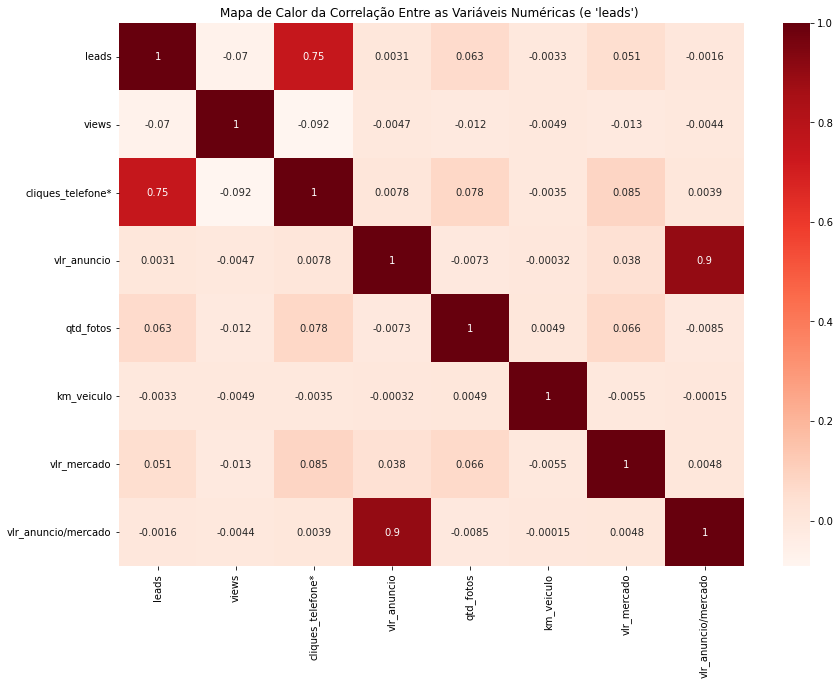

In [101]:
# Correlação (pearson) das variáveis numéricas com a coluna 'leads'
# Heatmap

plt.figure(figsize = (14,10))


sns.heatmap(df_num.corr(), annot = True, cmap = 'Reds')
plt.title("Mapa de Calor da Correlação Entre as Variáveis Numéricas (e 'leads') ")
plt.show()

É possível ver um correlação entre a variável 'leads' e 'cliques_telefone*'.  
Todas as outras variáveis não parecem ter forte correlação, inclusive a variável criada valor_anuncio/valor_mercado

In [102]:
df.reset_index(drop = True, inplace = True)

### Relação Leads x cliques_telefone

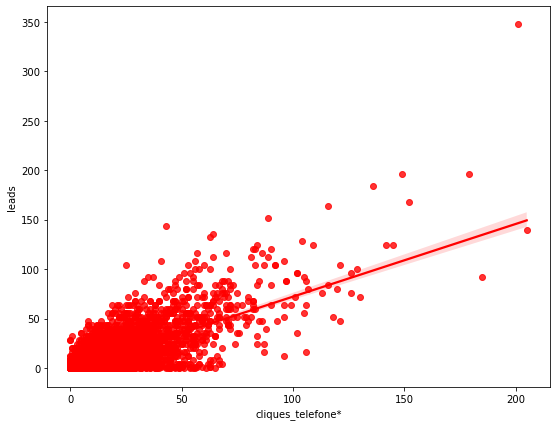

In [103]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'cliques_telefone*', y = 'leads', color = 'r');

> Pode-se notar uma relação positiva do numero de cliques no telefone com o numero de 'leads'.  

Text(0.5, 0, 'Cliques no Telefone do Anúncio')

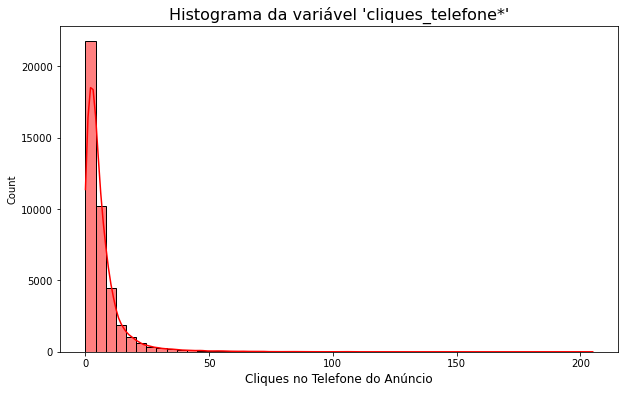

In [104]:
# Visualizando a variável 'cliques_telefone*'
plt.figure(figsize = (10,6))

sns.histplot(data = df, x = 'cliques_telefone*',bins = 50, color = 'r', kde = True)
plt.title("Histograma da variável 'cliques_telefone*'", fontdict={'fontsize':16})
plt.xlabel('Cliques no Telefone do Anúncio', fontdict={'fontsize':12})

### Relação Leads x Views

Irei plotar Leads com View para visualizar melhor a relação entre eles.  
Mesmo com uma percepção inicial de que Views influenciaria positivamente o numero de leads, visto que para um anúncio ter um lead, ele necessariamente precisa ter um view, o mapa de calor com as correlações não mostraram isso.

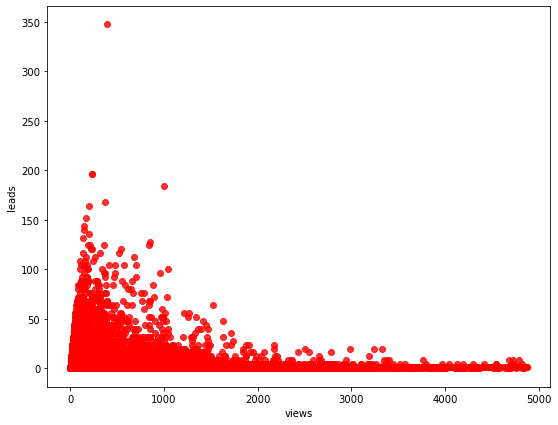

In [105]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'views', y = 'leads', color = 'r');

> Como visto no mapa de correlações, não há uma forte correlação entre as variaveis 'leads' e 'views'.  
> No entanto, acredito que a variável 'view' devesse ter uma correlação mais forte a variável 'leads'.  
> Irei tentar retirar valores outliers dessas variáveis para verificar se teremos um resultado diferente.

In [106]:
df[['leads', 'views']].describe()

,leads,views
count,41322.000000,41322.000000
mean,3.600261,418.666473
std,8.712076,604.503062
min,0.000000,0.000000
25%,1.000000,88.000000
50%,1.000000,212.000000
75%,4.000000,472.000000
max,348.000000,4872.000000


In [107]:
# Temos 1095 registros considaderados como outliers na coluna views que poderão ser tratados posteriormente
# Temos 766 registros considaderados como outliers na coluna views que poderão ser tratados posteriormente

In [108]:
# Criando um dataframe para alterar e analisar os dados
df_eda = df.copy()

In [109]:
# Retirando os outliers da coluna view
df_eda = df_eda[(np.abs(stats.zscore(df_eda.views)) < 3)]

In [110]:
# Retirando os outliers da coluna leads
df_eda = df_eda[(np.abs(stats.zscore(df_eda.leads)) < 3)]

In [111]:
# Ainda resta 39461 registros
len(df_eda)

39461

In [112]:
# Mesmo após a retirada dos outliers, as variáveis não pareceram ter uma forte correlação entre elas.
df_eda[['leads','views']].corr()

,leads,views
leads,1.000000,-0.079524
views,-0.079524,1.000000


A correlação entre as variáveis diminuiu ainda mais.

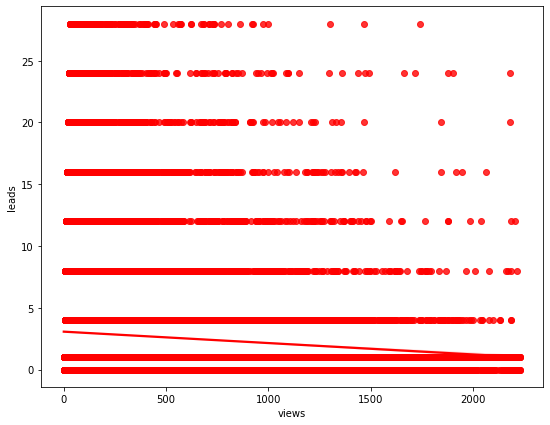

In [113]:
# plot das colunas 'leads' e 'views' após tratamento de outliers
plt.figure(figsize=(9,7))

sns.regplot(data = df_eda, x = 'views', y = 'leads', color = 'r');

> As variáveis continuaram sem ter uma correlação entre elas.

# Conclusão da Parte 1

- Modelos de carros do meio da década de 2010 costumas trazer mais leads que carros muitos antigos ou muito novos;  
- Anúncios nos estados de SP e RJ apresentam maiores média de leads, seguidos por GO, MG e BA (Apesar do AC aparecer em segundo lugar com maior média de leads, temos uma amostra muito pequena de lá, impossibilitando uma análise mais conclusiva);  
- Das cidades com mais anúncios (que também são cidade maiores), apenas a capital apresenta um alta média de leads (48 leads por anúncio) entre as 50 cidades com maior média de lead por anúncio;  
- Concluiu-se também que quanto mais acessórios no carro, maior a média de leads no anúncio;  
- Nas colunas que começam com o 'flg_' (flag), pode-se concluir também que registros onde haviam feito o que indica a coluna (por exemplo ser único dono, ter ipva pago, ter garantia de fábrica, etc.) houve maior número de leads. Destaque para a as colunas 'flg_aceita_troca', que quando positivo, teve média de quase 10 leads por anúncio, e também à variável 'flg_licenciado', que quando positivo, teve média superior a 8 leads por anúncio;
- Das variáveis numéricas, destaque apenas para a variável 'clique_telefone*', que mostrou uma correlação positiva de 0.75 com a variável target 'leads'.

# Parte 2

* Proponha um modelo para determinar se um anúncio receberá lead.
* Que outras informações, as quais você não teve acesso, poderiam ajudar a chegar a conclusões melhores?

# Pré Processamento de Dados

* Colunas a serem usadas no nosso algortimo: combustivel, cambio, marca(?), ano(?), alarme, airbag, 'arquente', 'bancocouro', 'abs', 'desembtras', 'travaeletr', arcondic, sensorestacion, rodasliga, 'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago', 'uf', 'clique_telefone*'

* Algumas colunas não foram incluidas pois haviam muito poucos registros dela no nosso dataset (ex: 'flg_blindado', flg_adaptado_pcd', etc)

Como preciso saber se um anúncio receberá ou não lead, criarei outra coluna de leads representada binariamente (0 -> não recebeu lead, 1 -> recebeu lead)

In [114]:
df.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP,PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
1,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP,SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
2,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP,SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N


In [115]:
df2 = df.copy()

In [116]:
df2['leads_bi'] = np.where((df.leads) == 0, 0, 1)

In [117]:
# Inserindo a coluna criada ao lado da variavel 'leads' original
df2.insert(5,'leads_bi', df2.pop('leads_bi'))

In [118]:
# A variável target está desbalanceada (22/78). Precisará ser balanceada posteriormente
df2['leads_bi'].value_counts()

1    32036
0     9286
Name: leads_bi, dtype: int64

In [119]:
df2.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,leads_bi,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,95,16462,1,1,0,0,0,6,12,2722,342061,2010,8,SP,PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
1,110,1987,1,1,0,0,0,2,2,1161,339241,2009,1,SP,SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
2,117,18367,1,1,0,0,0,10,3,687,344077,2010,9,SP,SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N


In [120]:
# Transformando colunas que estão com S e N em 1 e 0
cols = ['alarme', 'airbag', 'arquente', 'bancocouro', 'abs', 'desembtras', 'travaeletr', 'arcondic', 'sensorestacion', 'rodasliga']

In [121]:
df2[cols].head(3)

,alarme,airbag,arquente,bancocouro,abs,desembtras,travaeletr,arcondic,sensorestacion,rodasliga
0,S,S,S,S,S,S,S,S,S,S
1,S,S,S,N,S,S,S,S,N,N
2,N,N,S,N,N,S,S,S,N,S


In [122]:
for i in range(0, len(cols)):
    df2[cols[i]] = np.where((df[cols[i]]) == 'S', 1,0)

In [123]:
df2.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,leads_bi,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,95,16462,1,1,0,0,0,6,12,2722,342061,2010,8,SP,PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,1,1,1,1,1,1,1,1,S,1,S,1
1,110,1987,1,1,0,0,0,2,2,1161,339241,2009,1,SP,SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,1,1,1,0,1,1,1,1,S,0,N,0
2,117,18367,1,1,0,0,0,10,3,687,344077,2010,9,SP,SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,0,0,1,0,1,0,1,1,S,1,N,0


In [124]:
# Criando um cópia do dataset para usar posteriormente
df3 = df2.copy()

In [125]:
# Reduzindo o df para as somente as variáveis que iremos usar no nosso algoritmo
df2 = df2[['leads_bi', 'cliques_telefone*','cod_marca_veiculo', 'ano_modelo', 'uf','flg_unico_dono', 'flg_licenciado',
           'flg_ipva_pago', 'combustivel', 'cambio', 'alarme', 'airbag', 'arquente', 'bancocouro', 'abs',
           'desembtras', 'travaeletr', 'arcondic', 'sensorestacion', 'rodasliga'
           ]]

In [126]:
df2.head(3)

,leads_bi,cliques_telefone*,cod_marca_veiculo,ano_modelo,uf,flg_unico_dono,flg_licenciado,flg_ipva_pago,combustivel,cambio,alarme,airbag,arquente,bancocouro,abs,desembtras,travaeletr,arcondic,sensorestacion,rodasliga
0,0,6,12,2010,SP,1,1,1.0,gasolina e alcool,automatico sequencial,1,1,1,1,1,1,1,1,1,1
1,0,2,2,2009,SP,0,1,1.0,gasolina e alcool,automatico,1,1,1,0,1,1,1,1,0,0
2,0,10,3,2010,SP,1,1,1.0,gasolina e alcool,manual,0,0,1,0,0,1,1,1,0,1


### One-Hot Encoding

Como as variáveis que precisam ser transformadas não são ordinais, decidi por escolher o One-Hot Encoding para transforma-las

In [127]:
for i in ['ano_modelo', 'uf', 'combustivel', 'cambio']:
    onehots = pd.get_dummies(df[i], prefix = 'cat') # get_dummies() -> convert categorical variable into dummy/indicator variables
    df2 = df2.join(onehots)

In [128]:
df2.head(3)

,leads_bi,cliques_telefone*,cod_marca_veiculo,ano_modelo,uf,flg_unico_dono,flg_licenciado,flg_ipva_pago,combustivel,cambio,alarme,airbag,arquente,bancocouro,abs,desembtras,travaeletr,arcondic,sensorestacion,rodasliga,cat_1951,cat_1965,cat_1970,cat_1972,cat_1973,cat_1974,cat_1975,cat_1976,cat_1977,cat_1979,cat_1980,cat_1981,cat_1982,cat_1985,cat_1988,cat_1990,cat_1991,cat_1992,cat_1993,cat_1994,cat_1995,cat_1996,cat_1997,cat_1998,cat_1999,cat_2000,cat_2001,cat_2002,cat_2003,cat_2004,cat_2005,cat_2006,cat_2007,cat_2008,cat_2009,cat_2010,cat_2011,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_AC,cat_AL,cat_AM,cat_AP,cat_BA,cat_CE,cat_DF,cat_ES,cat_GO,cat_MA,cat_MG,cat_MS,cat_MT,cat_PA,cat_PB,cat_PE,cat_PI,cat_PR,cat_RJ,cat_RN,cat_RO,cat_RR,cat_RS,cat_SC,cat_SE,cat_SP,cat_TO,cat_alcool,cat_alcool e gas natural,cat_diesel,cat_gas natural,cat_gasolina,cat_gasolina e alcool,cat_gasolina e eletrico,cat_gasolina e gas natural,"cat_gasolina, alcool e gas natural","cat_gasolina, alcool, gas natural e benzina",cat_CVT,cat_automatico,cat_automatico sequencial,cat_automatizado,cat_automatizado DCT,cat_manual,cat_semi-automatico
0,0,6,12,2010,SP,1,1,1.0,gasolina e alcool,automatico sequencial,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,2,2,2009,SP,0,1,1.0,gasolina e alcool,automatico,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,10,3,2010,SP,1,1,1.0,gasolina e alcool,manual,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Agora que aplicamos o one-hot encodings no nosso dataset, temos que retirar as variaveis originais

In [129]:
# Removendo colunas que foram feita one-hot encoding
df2.drop(['ano_modelo', 'uf', 'combustivel', 'cambio'], axis = 1, inplace = True)

In [130]:
df2.head(3)

,leads_bi,cliques_telefone*,cod_marca_veiculo,flg_unico_dono,flg_licenciado,flg_ipva_pago,alarme,airbag,arquente,bancocouro,abs,desembtras,travaeletr,arcondic,sensorestacion,rodasliga,cat_1951,cat_1965,cat_1970,cat_1972,cat_1973,cat_1974,cat_1975,cat_1976,cat_1977,cat_1979,cat_1980,cat_1981,cat_1982,cat_1985,cat_1988,cat_1990,cat_1991,cat_1992,cat_1993,cat_1994,cat_1995,cat_1996,cat_1997,cat_1998,cat_1999,cat_2000,cat_2001,cat_2002,cat_2003,cat_2004,cat_2005,cat_2006,cat_2007,cat_2008,cat_2009,cat_2010,cat_2011,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_AC,cat_AL,cat_AM,cat_AP,cat_BA,cat_CE,cat_DF,cat_ES,cat_GO,cat_MA,cat_MG,cat_MS,cat_MT,cat_PA,cat_PB,cat_PE,cat_PI,cat_PR,cat_RJ,cat_RN,cat_RO,cat_RR,cat_RS,cat_SC,cat_SE,cat_SP,cat_TO,cat_alcool,cat_alcool e gas natural,cat_diesel,cat_gas natural,cat_gasolina,cat_gasolina e alcool,cat_gasolina e eletrico,cat_gasolina e gas natural,"cat_gasolina, alcool e gas natural","cat_gasolina, alcool, gas natural e benzina",cat_CVT,cat_automatico,cat_automatico sequencial,cat_automatizado,cat_automatizado DCT,cat_manual,cat_semi-automatico
0,0,6,12,1,1,1.0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,2,2,0,1,1.0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,10,3,1,1,1.0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [131]:
len(df2.columns)

105

> Como inicialmente iremos utilizar o algoritmo de árvore de decisão, que não exige uma normalização dos dados, não irei o fazer nesse momento. Caso seja necessário, farei posteriormente

### Balanceamento da Variável target

Como não podemos coletar mais dados de anuncios que não tiveram leads, uma das soluções para essa variável desbalanceada, seria fazer um undersampling(nas variáveis dominantes) nos dados de treinos

* Previamente iremos separar o dataset em dados de treino e dados de teste, para só dps aplicar o SMOTE

In [132]:
# Separando na as variáveis preditoras da variável target
X = df2.drop(['leads_bi'], axis = 1)
y = df2['leads_bi']

In [133]:
# Separando os dados em dados de treino e dados de teste
X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size=0.3)

In [134]:
# Verificando se foi separado corretamente (70/30)
print(len(X_train))
print(len(X_teste))

28925
12397


In [135]:
y_train.head()

8466     0
37401    1
12252    0
24003    1
22864    1
Name: leads_bi, dtype: int32

In [136]:
# Balancemaneto de Classe (Target)
smt = SMOTE()

In [137]:
# Aplicando o fit(SMOTE) apenas nos dados de treino
X_train, y_train = smt.fit_resample(X_train, y_train)

In [138]:
# Verificando se a variável target foi balanceada 
np.bincount(y_train)

array([22406, 22406], dtype=int64)

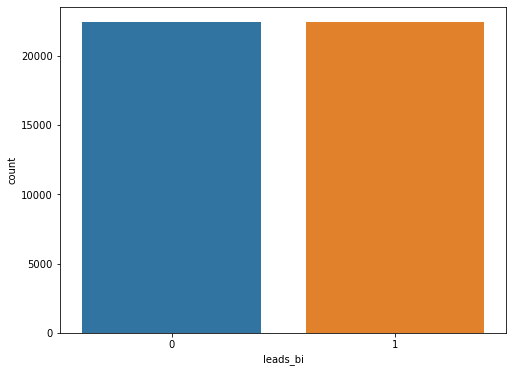

In [139]:
# Plot da variável target ('leads_bi') balanceada
plt.figure(figsize= (8,6))

ax = sns.countplot(x = y_train)

> Pode-se concluir que a variável target está balanceada

## Decision Tree

In [140]:
# Instanciando o algoritmo de árvore de decisão classificador
tree_clf = DecisionTreeClassifier()

In [141]:
# Treinando os modelos de treino
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Prevendo os Valores

In [142]:
# Prevendo os dados de teste
y_pred = tree_clf.predict(X_teste)

### Avaliando o modelo

In [143]:
print('Acurácia: ', metrics.accuracy_score(y_teste, y_pred))

Acurácia:  0.6386222473178995


In [144]:
# Confusion matrix
cf_matrix = metrics.confusion_matrix(y_teste, y_pred)

In [145]:
cf_matrix_df = pd.DataFrame(cf_matrix, columns = ['Sem lead','Com lead'])
cf_matrix_df.rename(index = {0:'Sem lead', 1:'Com lead'})

,Sem lead,Com lead
Sem lead,848,1919
Com lead,2561,7069


### Decision Tree sem balanceamento das variáveis (sem SMOTE)

In [146]:
# Separando os dados em dados de treino e dados de teste
X_train, X_teste, y_train, y_teste = train_test_split(X, y, test_size=0.3)

In [147]:
# Verificando se foi separado corretamente (70/30)
print(len(X_train))
print(len(X_teste))

28925
12397


In [148]:
y_train.head()

28364    1
8996     1
810      1
34067    1
11862    0
Name: leads_bi, dtype: int32

In [149]:
# Instanciando o algoritmo de árvore de decisão classificador
tree_clf = DecisionTreeClassifier()

In [150]:
# Treinando os modelos de treino
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
# Prevendo os dados de teste
y_pred = tree_clf.predict(X_teste)

In [152]:
# avaliando o modelo
print('Acurácia: ', metrics.accuracy_score(y_teste, y_pred))

Acurácia:  0.6463660563039445


In [153]:
# Confusion matrix
cf_matrix = metrics.confusion_matrix(y_teste, y_pred)
cf_matrix_df = pd.DataFrame(cf_matrix, columns = ['Sem lead','Com lead'])
cf_matrix_df.rename(index = {0:'Sem lead', 1:'Com lead'})

,Sem lead,Com lead
Sem lead,724,2053
Com lead,2331,7289


## Seleção de Atributos

* Com a ambição de aumentar ainda mais a acurácia do modelo, irei aplicar o Random Forest para selecionar variáveis que possam ser melhores para o modelo 

### Random Forest

In [154]:
# Usando o dataset copiado previamente com parte do pre-processamento de dados feito
df3.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,leads_bi,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf,cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,95,16462,1,1,0,0,0,6,12,2722,342061,2010,8,SP,PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,1,1,1,1,1,1,1,1,S,1,S,1
1,110,1987,1,1,0,0,0,2,2,1161,339241,2009,1,SP,SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,1,1,1,0,1,1,1,1,S,0,N,0
2,117,18367,1,1,0,0,0,10,3,687,344077,2010,9,SP,SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,0,0,1,0,1,0,1,1,S,1,N,0


> Ainda há algumas colunas em formato 'S' e 'N' ('object' dtype)

In [155]:
cols = ['vidroseletr', 'sensorchuva']
for i in range(0, len(cols)):
    df3[cols[i]] = np.where((df3[cols[i]]) == 'S', 1,0)

In [156]:
# Removendo algumas colunas que apresentam número grande demais de valores únicos e que não fazem sentido para usar no nosso modelo
df3.drop(['cod_anuncio','cod_cliente','leads','cod_modelo_veiculo', 'cod_versao_veiculo','cep_2dig','cidade'], axis = 1, inplace = True)

In [157]:
df3.head(3)

,cod_tipo_pessoa,prioridade,leads_bi,views,cliques_telefone*,cod_marca_veiculo,ano_modelo,uf,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,1,1,0,0,6,12,2010,SP,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,0,0,2,2,2009,SP,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,1,1,1,0,1,1,1,1,1,0,0,0
2,1,1,0,0,10,3,2010,SP,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,0,0,1,0,1,0,1,1,1,1,0,0


* One-Hot Encoding

In [158]:
dum_cols = ['ano_modelo','uf','combustivel', 'cambio']
for i in dum_cols:
    onehots = pd.get_dummies(df3[i], prefix = 'cat')
    df3 = df3.join(onehots)

In [159]:
# Removendo as colunas que foram feitas one hot encoding
df3.drop(dum_cols, axis = 1, inplace = True)

In [160]:
df3.head(3)

,cod_tipo_pessoa,prioridade,leads_bi,views,cliques_telefone*,cod_marca_veiculo,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion,cat_1951,cat_1965,cat_1970,cat_1972,cat_1973,cat_1974,cat_1975,cat_1976,cat_1977,cat_1979,cat_1980,cat_1981,cat_1982,cat_1985,cat_1988,cat_1990,cat_1991,cat_1992,cat_1993,cat_1994,cat_1995,cat_1996,cat_1997,cat_1998,cat_1999,cat_2000,cat_2001,cat_2002,cat_2003,cat_2004,cat_2005,cat_2006,cat_2007,cat_2008,cat_2009,cat_2010,cat_2011,cat_2012,cat_2013,cat_2014,cat_2015,cat_2016,cat_2017,cat_2018,cat_2019,cat_AC,cat_AL,cat_AM,cat_AP,cat_BA,cat_CE,cat_DF,cat_ES,cat_GO,cat_MA,cat_MG,cat_MS,cat_MT,cat_PA,cat_PB,cat_PE,cat_PI,cat_PR,cat_RJ,cat_RN,cat_RO,cat_RR,cat_RS,cat_SC,cat_SE,cat_SP,cat_TO,cat_alcool,cat_alcool e gas natural,cat_diesel,cat_gas natural,cat_gasolina,cat_gasolina e alcool,cat_gasolina e eletrico,cat_gasolina e gas natural,"cat_gasolina, alcool e gas natural","cat_gasolina, alcool, gas natural e benzina",cat_CVT,cat_automatico,cat_automatico sequencial,cat_automatizado,cat_automatizado DCT,cat_manual,cat_semi-automatico
0,1,1,0,0,6,12,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,4.0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,2,2,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,4.0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,10,3,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,4.0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [161]:
# Separando em dados de treino e de teste
X = df3.drop(['leads_bi'], axis = 1)
y = df3['leads_bi']

X_train, X_teste, y_train, y_teste= train_test_split (X, y, test_size = 0.3)

In [162]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
y_pred = rf.predict(X_teste)
print(metrics.classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.01      0.02      2790
           1       0.78      0.99      0.87      9607

    accuracy                           0.77     12397
   macro avg       0.52      0.50      0.44     12397
weighted avg       0.66      0.77      0.68     12397



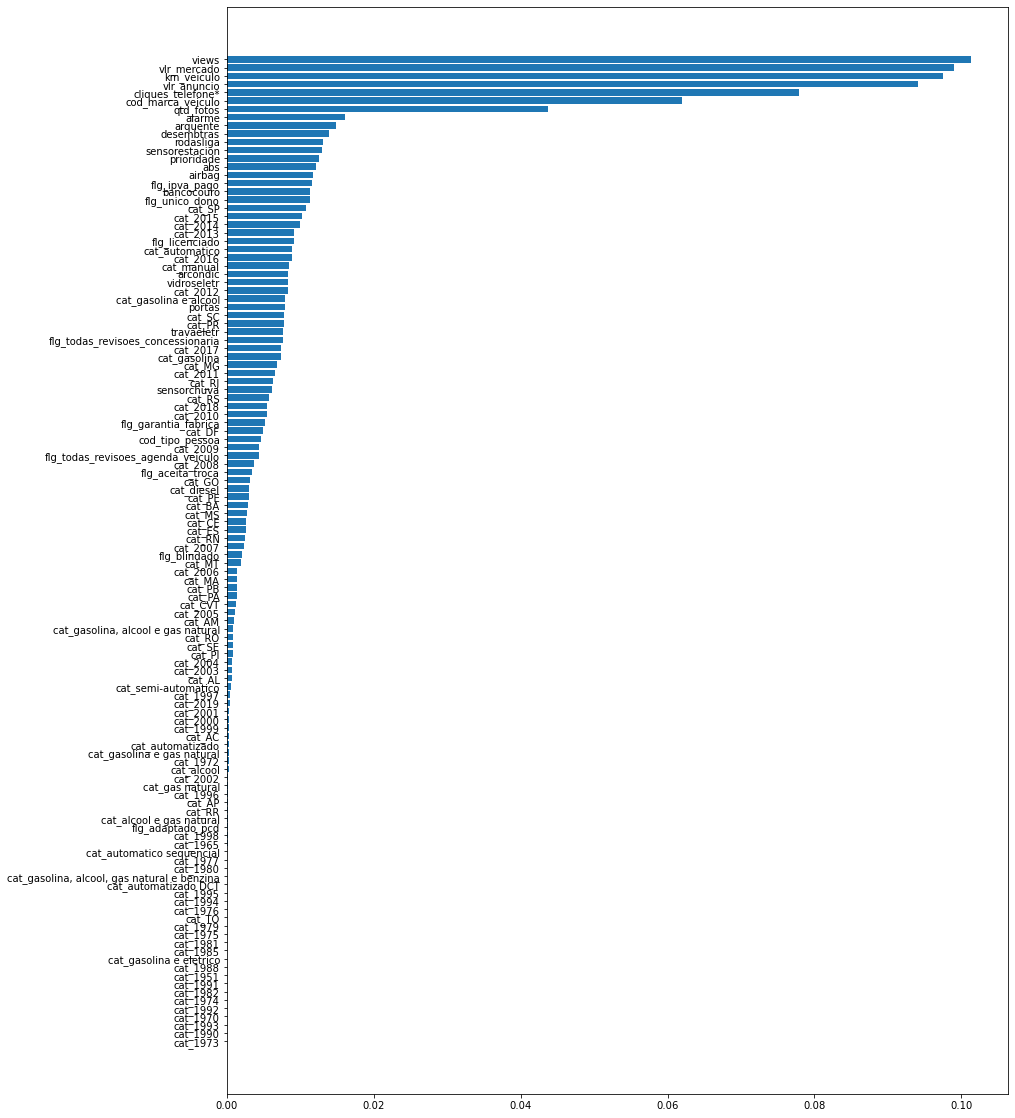

In [167]:
f_i = list(zip(X_train.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])

plt.figure(figsize=(14,20))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

> Usarei as 15 melhores variáveis (segundo o Random Forest) no novo modelo

In [168]:
# Colunas que serão usadas para testar o modelo novamente
cols = ['views','vlr_mercado','km_veiculo','vlr_anuncio','cliques_telefone*','cod_marca_veiculo','qtd_fotos',
        'alarme','arquente','desembtras','rodasliga','sensorestacion','prioridade','abs','airbag']

In [170]:
# Aplicando SMOTE 
X_train, y_train = smt.fit_resample(X_train, y_train)

In [171]:
# verificando se á variavel target foi balanceada
np.bincount(y_train)

array([22429, 22429], dtype=int64)

In [172]:
# Treinando o modelo Decision Tree Classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [173]:
# Prevendo os valores
y_pred = tree_clf.predict(X_teste)

In [175]:
# AValiando o modelo
print('Acurácia: ', metrics.accuracy_score(y_teste, y_pred))

Acurácia:  0.6398322174719691


In [176]:
# Confusion matrix
cf_matrix = metrics.confusion_matrix(y_teste, y_pred)
cf_matrix_df = pd.DataFrame(cf_matrix, columns =['Sem lead','Com lead'])
cf_matrix_df.rename(index = {0:'Sem lead', 1:'Com lead'})

,Sem lead,Com lead
Sem lead,784,2006
Com lead,2459,7148


## SVM

# Conclusão Parte 2

Dados que não tive acesso, mas que acrescentariam no dataset:
- Cor;
- Painel Multimidia;
- Um dicionário que trouxesse o que representa a versão, a marca e o modelo dos carros de forma nominal;